## Job Search Analysis

So far, we have the data and need to give out some recommendations of some job searching techniques. In other words, when we know a job goal, this analysis will tell you how to search the job on Indeed is the best way. 

To start with, I will assume that people know what job they want to get. For example, people who want to be a salesman probably do not want to be a software engineer. Therefore, I assume everyone goes to Indeed with their job in mind.

Then, I will categorize people into the following four different groups:
 1. people only have time requirement 
 2. people only have location requirement
 3. people with both requirements 
 4. people with no requirement

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# To start with, I will read my data first.
df = pd.read_excel(r'C:\Users\qiuwk\Google Drive\Projects\Job_Search.xlsx', index_col =0 )
df.head()

Date            keyword  job type     location  result_1 result_2  \
0 2020-05-21               data  fulltime  Los+Angeles         3   14,820   
1 2020-05-21  software+engineer  fulltime  Los+Angeles         0    1,701   
2 2020-05-21        web+develop  fulltime  Los+Angeles         1    1,512   
3 2020-05-21            finance  fulltime  Los+Angeles         1    1,235   
4 2020-05-21              audit  fulltime  Los+Angeles         0    3,473   

  result_3 result_4 result_5  
0        6       44    7,891  
1        1    1,719    2,451  
2        1       25    1,221  
3        1    1,234    1,930  
4        0        7    2,489

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244 entries, 0 to 1243
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1244 non-null   datetime64[ns]
 1   keyword   1244 non-null   object        
 2   job type  1244 non-null   object        
 3   location  1244 non-null   object        
 4   result_1  1244 non-null   int64         
 5   result_2  1244 non-null   object        
 6   result_3  1244 non-null   object        
 7   result_4  1244 non-null   object        
 8   result_5  1244 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 97.2+ KB


In [4]:
# As I realized that some results are in object type, so I changed them into numbers.

for i in range(1,6):
    col = "result_" + str(i)
    df[col] = df[col].astype('str')
    df[col] = df[col].str.replace("," , "")
    df[col] = df[col].astype('int32')


__Here we haev a brief summary of our columns__

In [5]:
job = df['keyword'].unique().copy()
print(job)

loc = df['location'].unique().copy()
print(loc)

jobt = df['job type'].unique().copy()
print(jobt)

['data' 'software+engineer' 'web+develop' 'finance' 'audit' 'sales']
['Los+Angeles' 'San+Francisco' 'Seattle' 'Boston' 'New+York' 'Houston'
 'Chicago']
['fulltime' 'parttime' 'contract']


# Data

I will start with those who have requirements of both location and job type

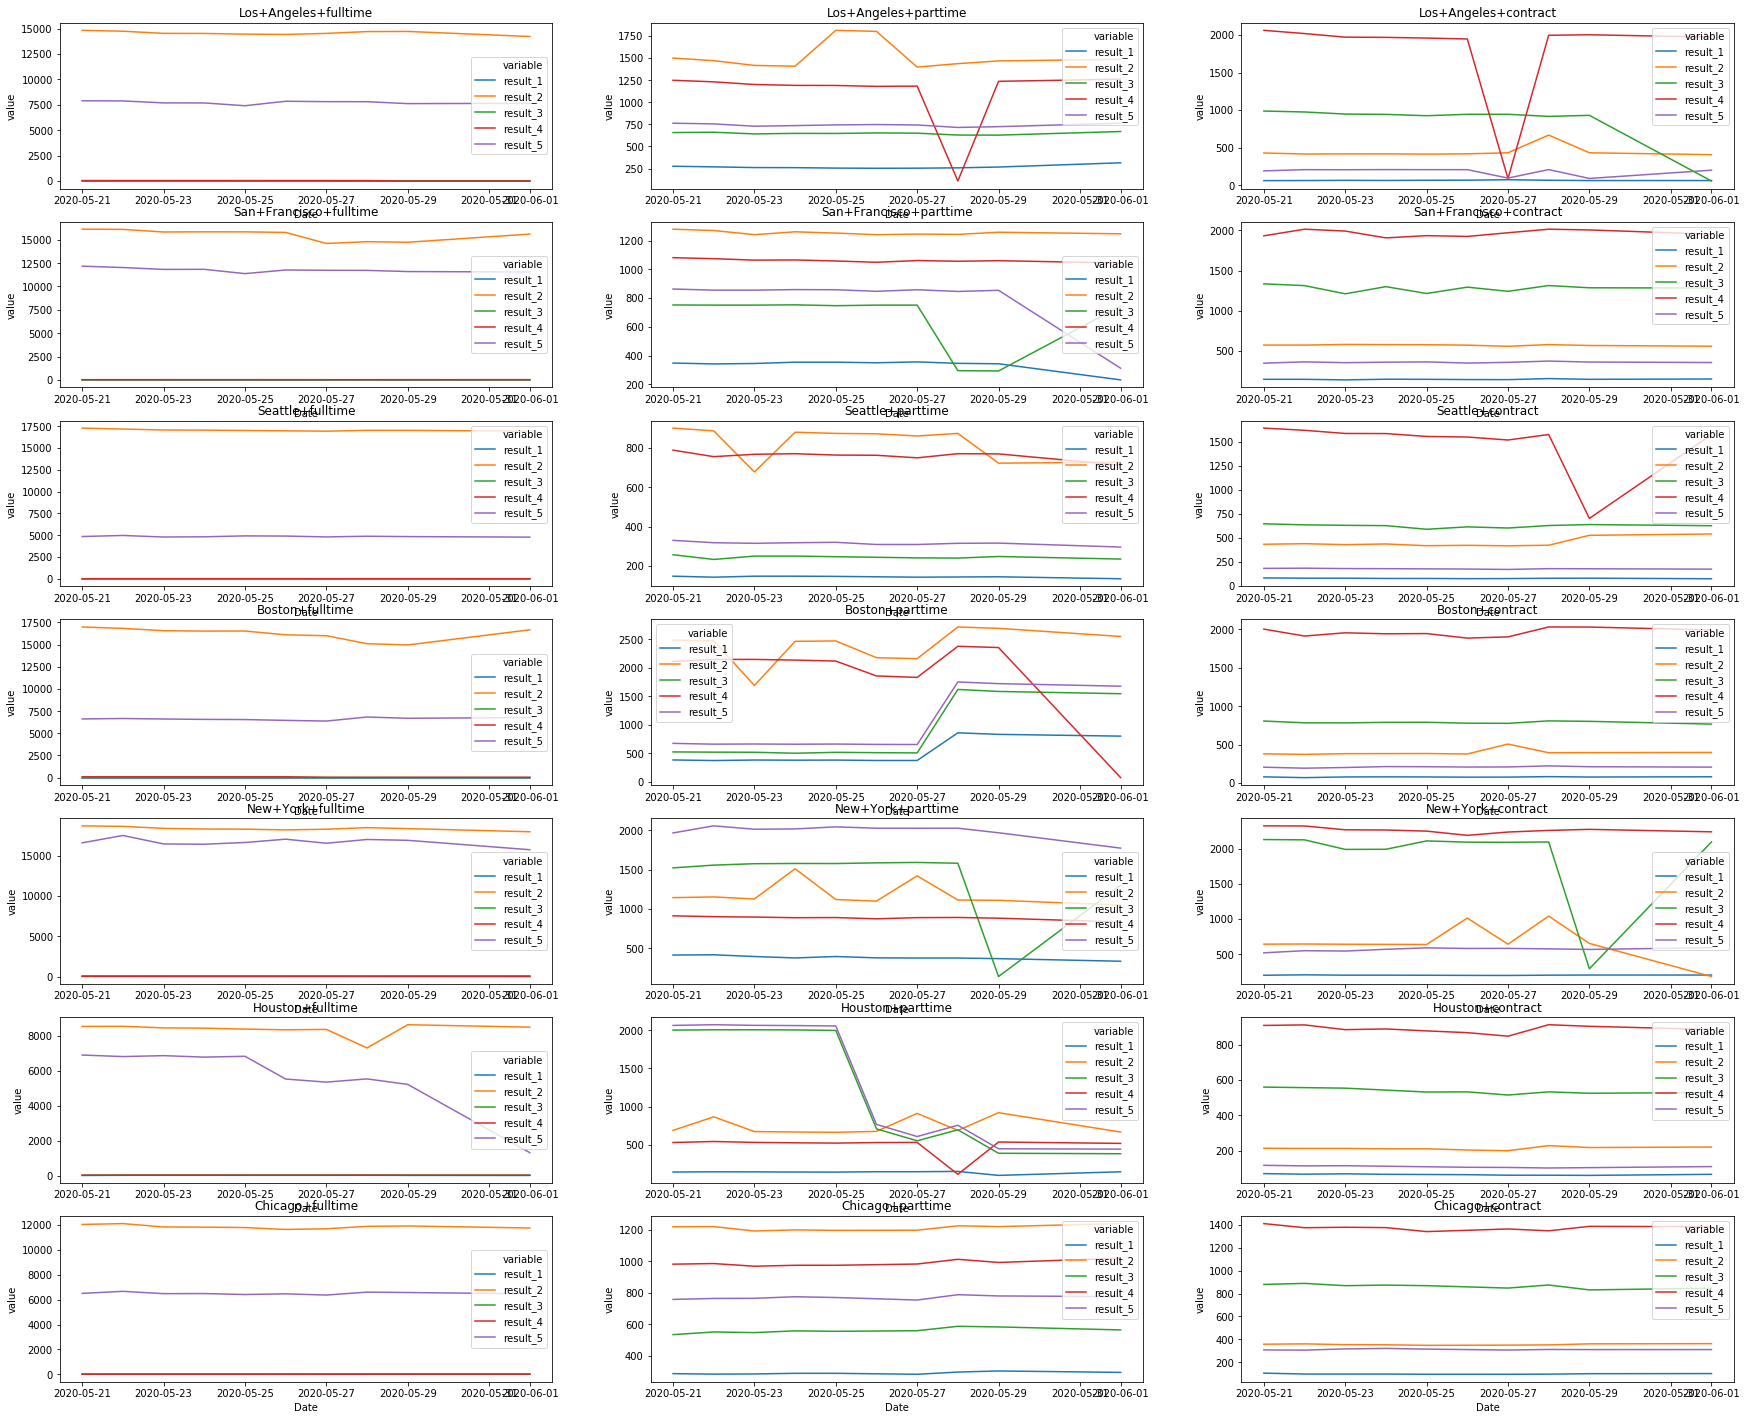

In [6]:
result = df[df['keyword']=='data'].copy()
result['col'] = result['location'] + "+" +result['job type']

city_type = result['col'].unique().tolist()

fig, axes = plt.subplots(7, 3,figsize = (30,25))

row = 0
column = 0

for i in city_type:
    sub_result = pd.melt(result[result['col']== i],id_vars=['Date'],value_vars = ['result_1','result_2','result_3','result_4','result_5'])
    sns.lineplot(x = 'Date', y = 'value', hue = 'variable',estimator = None,data=sub_result, ax = axes[row][column]).set(title = i)
    column += 1
    if column == 3:
        row += 1
        column = 0

Then, I will give out my choice of search methods based on the graphs. 

And my criteria is really simple: the lines should perform a similar trend with the normals and there should be a "sufficient but not too large" number of jobs.

After all, I will create a table based on my suggestions.

In [7]:
rec1_result = [[5],[1,3,5],[2,5],
          [5],[1,4,5],[2,3,5],
          [5],[1,3,5],[2,3],
          [5],[3,5],[2,3],
          [5],[1,4],[5],
          [5],[2,3,5],[5],
          [5],[3,4,5],[2,5]]

data = {}

for i in city_type:
    index = city_type.index(i)
    data.update({i: str(rec1_result[index])})

Rec = pd.DataFrame.from_dict(data, orient='index')

Rec['Job Info'] = Rec.index

job_type = []
location = []
for i in Rec['Job Info']:
    txt = i.split("+")
    job_type.append(txt[-1])
    if len(txt) > 2:
        city = txt[-3] + ' ' +txt[-2]
    location.append(city)

Rec['Job Type'] = job_type
Rec['Location'] = location

Rec.drop(columns = ['Job Info'])
Rec = Rec.rename(columns = {0:'Recommended Search Method'})
Rec = Rec[['Location','Job Type', 'Recommended Search Method']]
Rec.sort_values(by = ['Location','Job Type'])
Rec.reset_index(drop=True, inplace=True)

Rec

Location  Job Type Recommended Search Method
0     Los Angeles  fulltime                       [5]
1     Los Angeles  parttime                 [1, 3, 5]
2     Los Angeles  contract                    [2, 5]
3   San Francisco  fulltime                       [5]
4   San Francisco  parttime                 [1, 4, 5]
5   San Francisco  contract                 [2, 3, 5]
6   San Francisco  fulltime                       [5]
7   San Francisco  parttime                 [1, 3, 5]
8   San Francisco  contract                    [2, 3]
9   San Francisco  fulltime                       [5]
10  San Francisco  parttime                    [3, 5]
11  San Francisco  contract                    [2, 3]
12       New York  fulltime                       [5]
13       New York  parttime                    [1, 4]
14       New York  contract                       [5]
15       New York  fulltime                       [5]
16       New York  parttime                 [2, 3, 5]
17       New York  contract                       [5]
18       New York  fulltime                       [5]
19       New York  parttime                 [3, 4, 5]
20       New York  contract                    [2, 5]

__Recommend based on location__

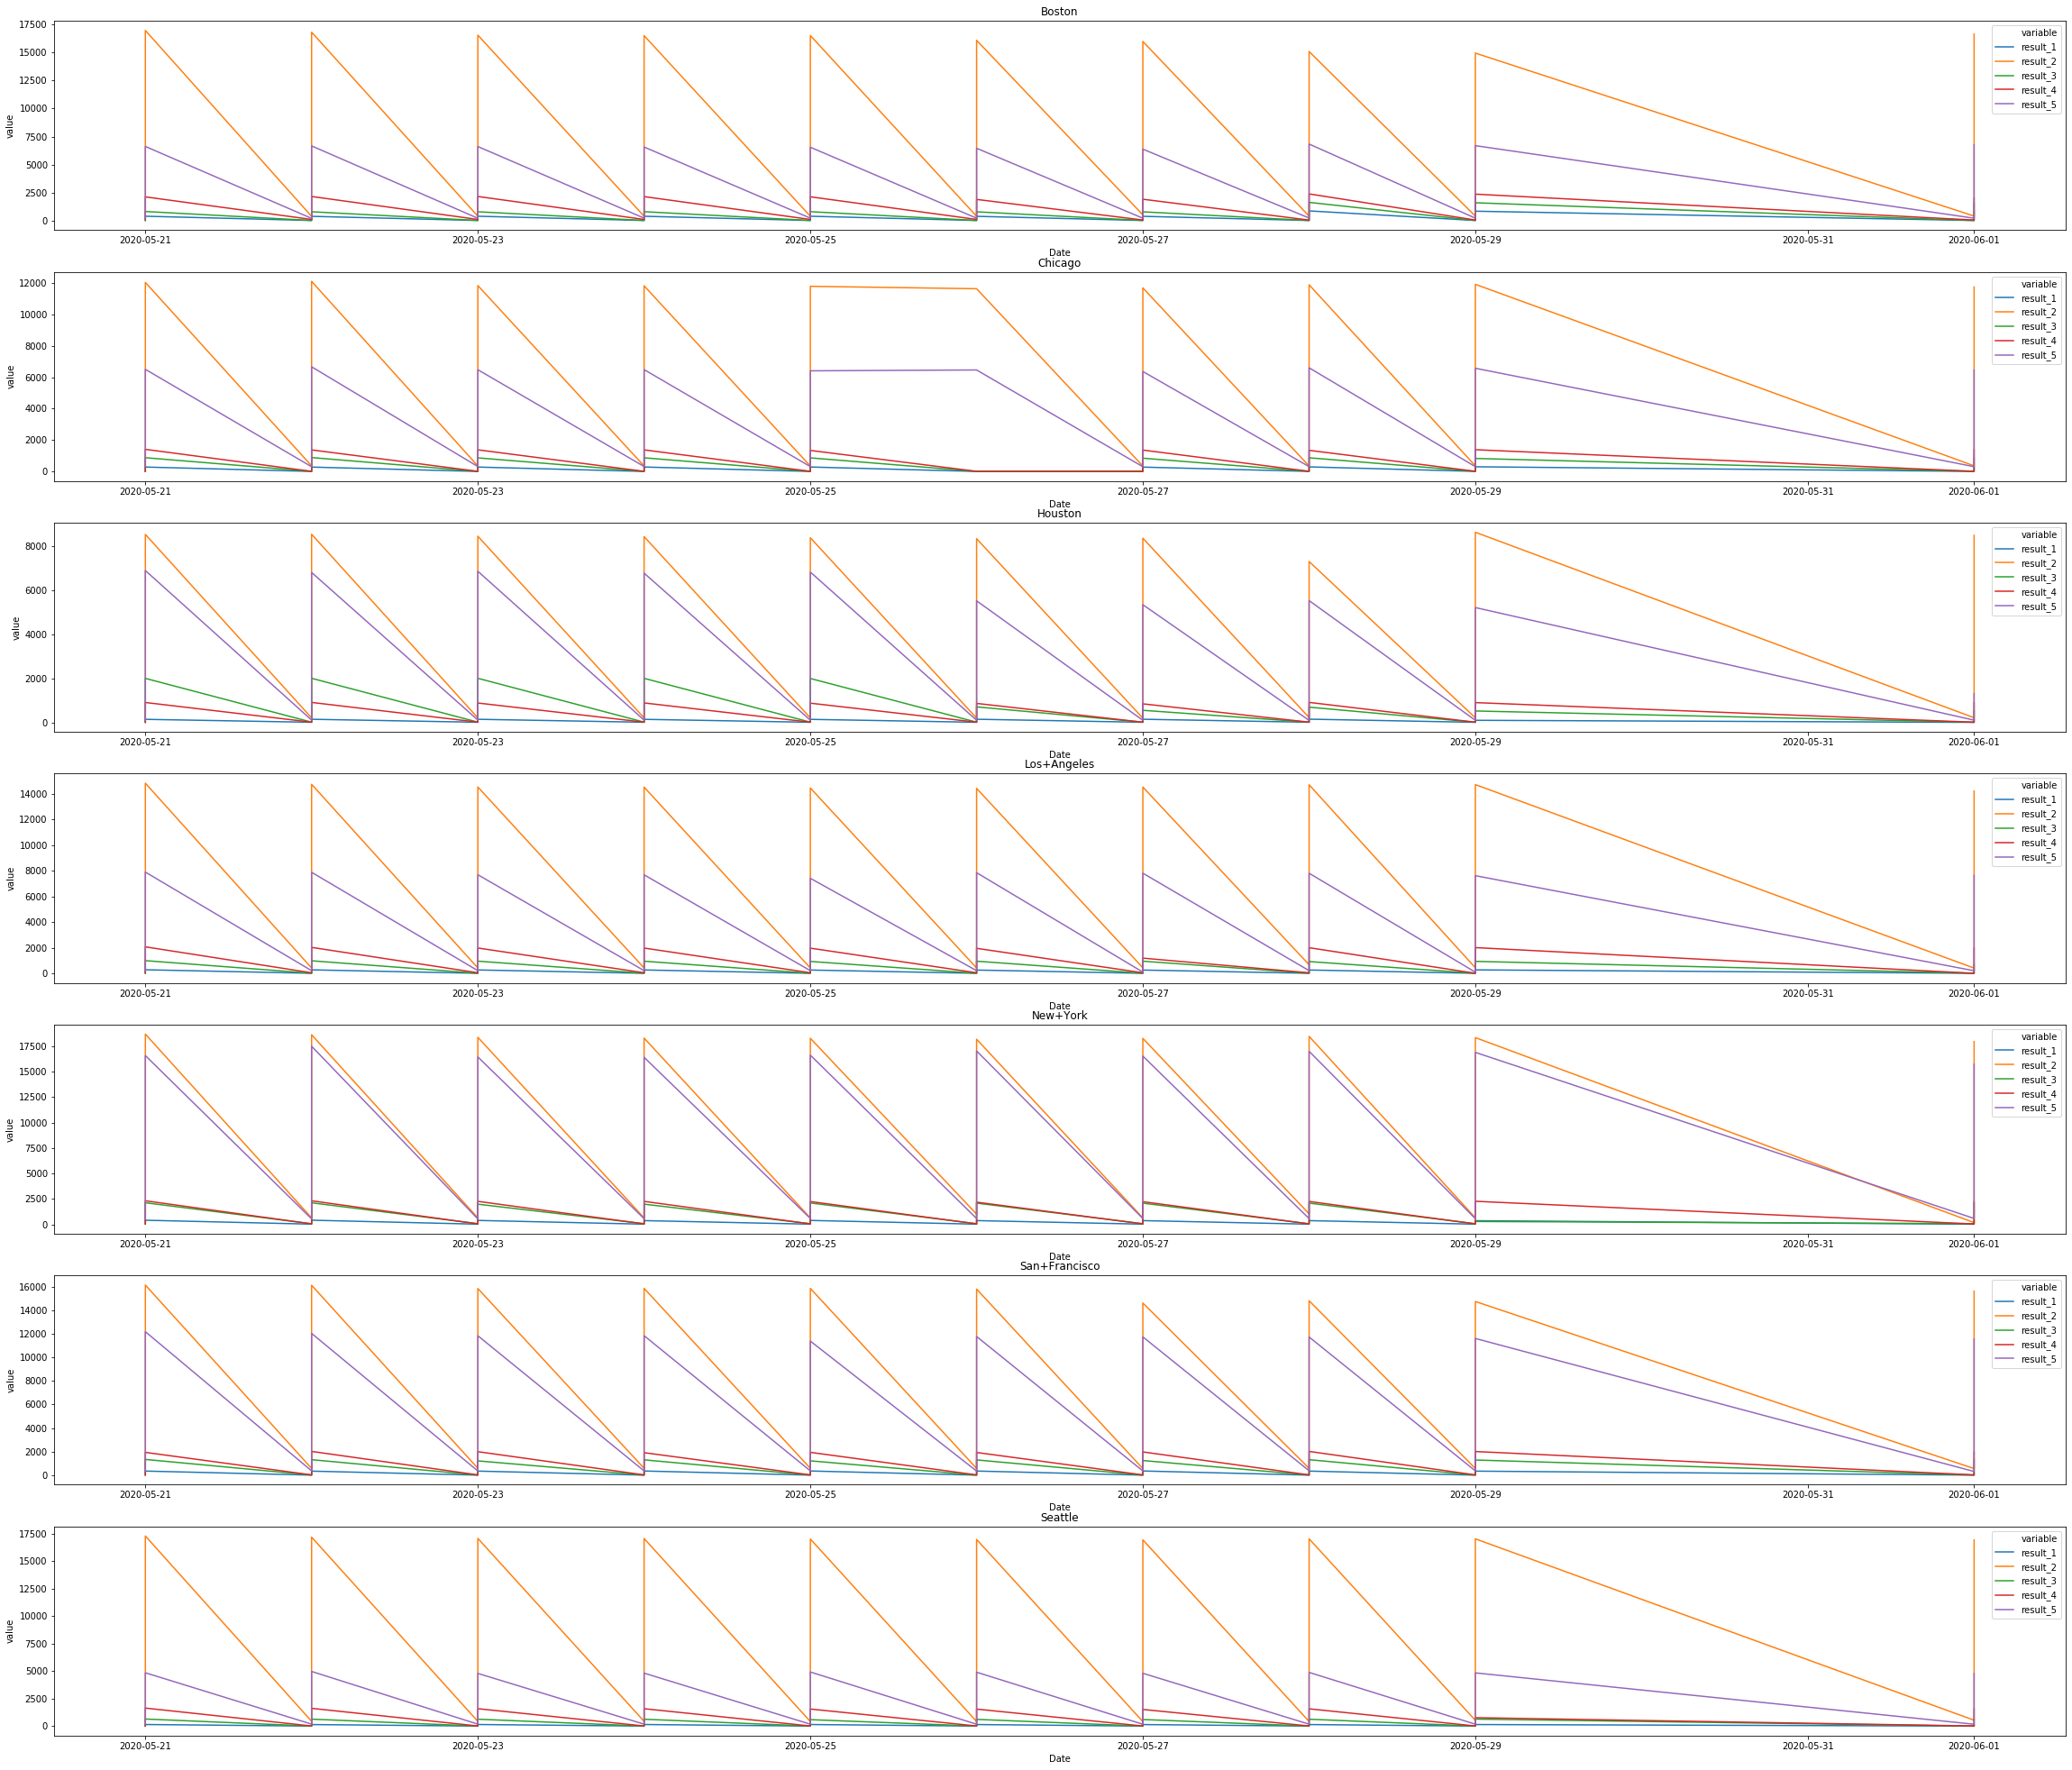

In [8]:
# Visualize the distribution of results based on location

location_result = result.groupby(['Date','location']).sum()
location_result.reset_index(inplace = True)

city = location_result['location'].unique().tolist()

fig, axes = plt.subplots(7,1,figsize = (40,35))

for i in city:
    sub_result = pd.melt(result[result['location']== i],id_vars=['Date'],
                         value_vars = ['result_1','result_2','result_3','result_4','result_5'])
    sns.lineplot(x = 'Date', y = 'value', hue = 'variable',estimator = None,data=sub_result, ax = axes[city.index(i)]).set(title = i)


Based on the graph, I would recommend 3 and 4 for job search.

__Recommendation based on job type__

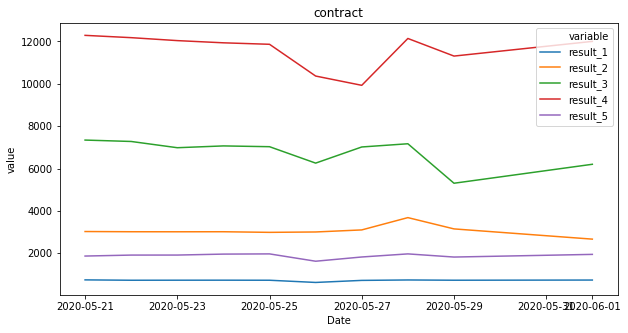

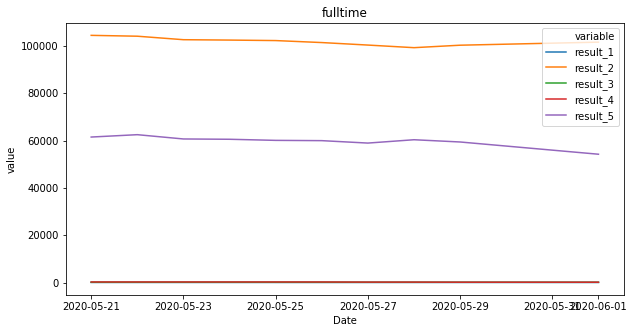

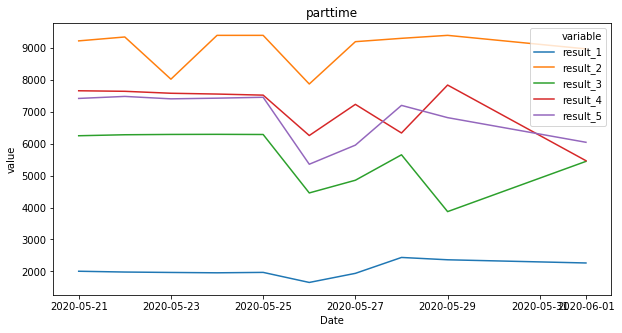

In [9]:
# Visualize the dsitribution of results based on job type

job_result = result.groupby(['Date','job type']).sum()
job_result.reset_index(inplace = True)
job_result

count = 1

for i in job_result['job type'].unique():
    plt.figure(count, figsize = (10,5))
    sub_result = pd.melt(job_result[job_result['job type']== i],id_vars=['Date'],value_vars = ['result_1','result_2','result_3','result_4','result_5'])
    sns.lineplot(x = 'Date', y = 'value', hue = 'variable',estimator = None,data=sub_result).set_title(i)
    count += 1

Based on the graphs, I would choose 2 and 5 for job searching.

# Software Engineer

I will start with those who have requirements of both location and job type

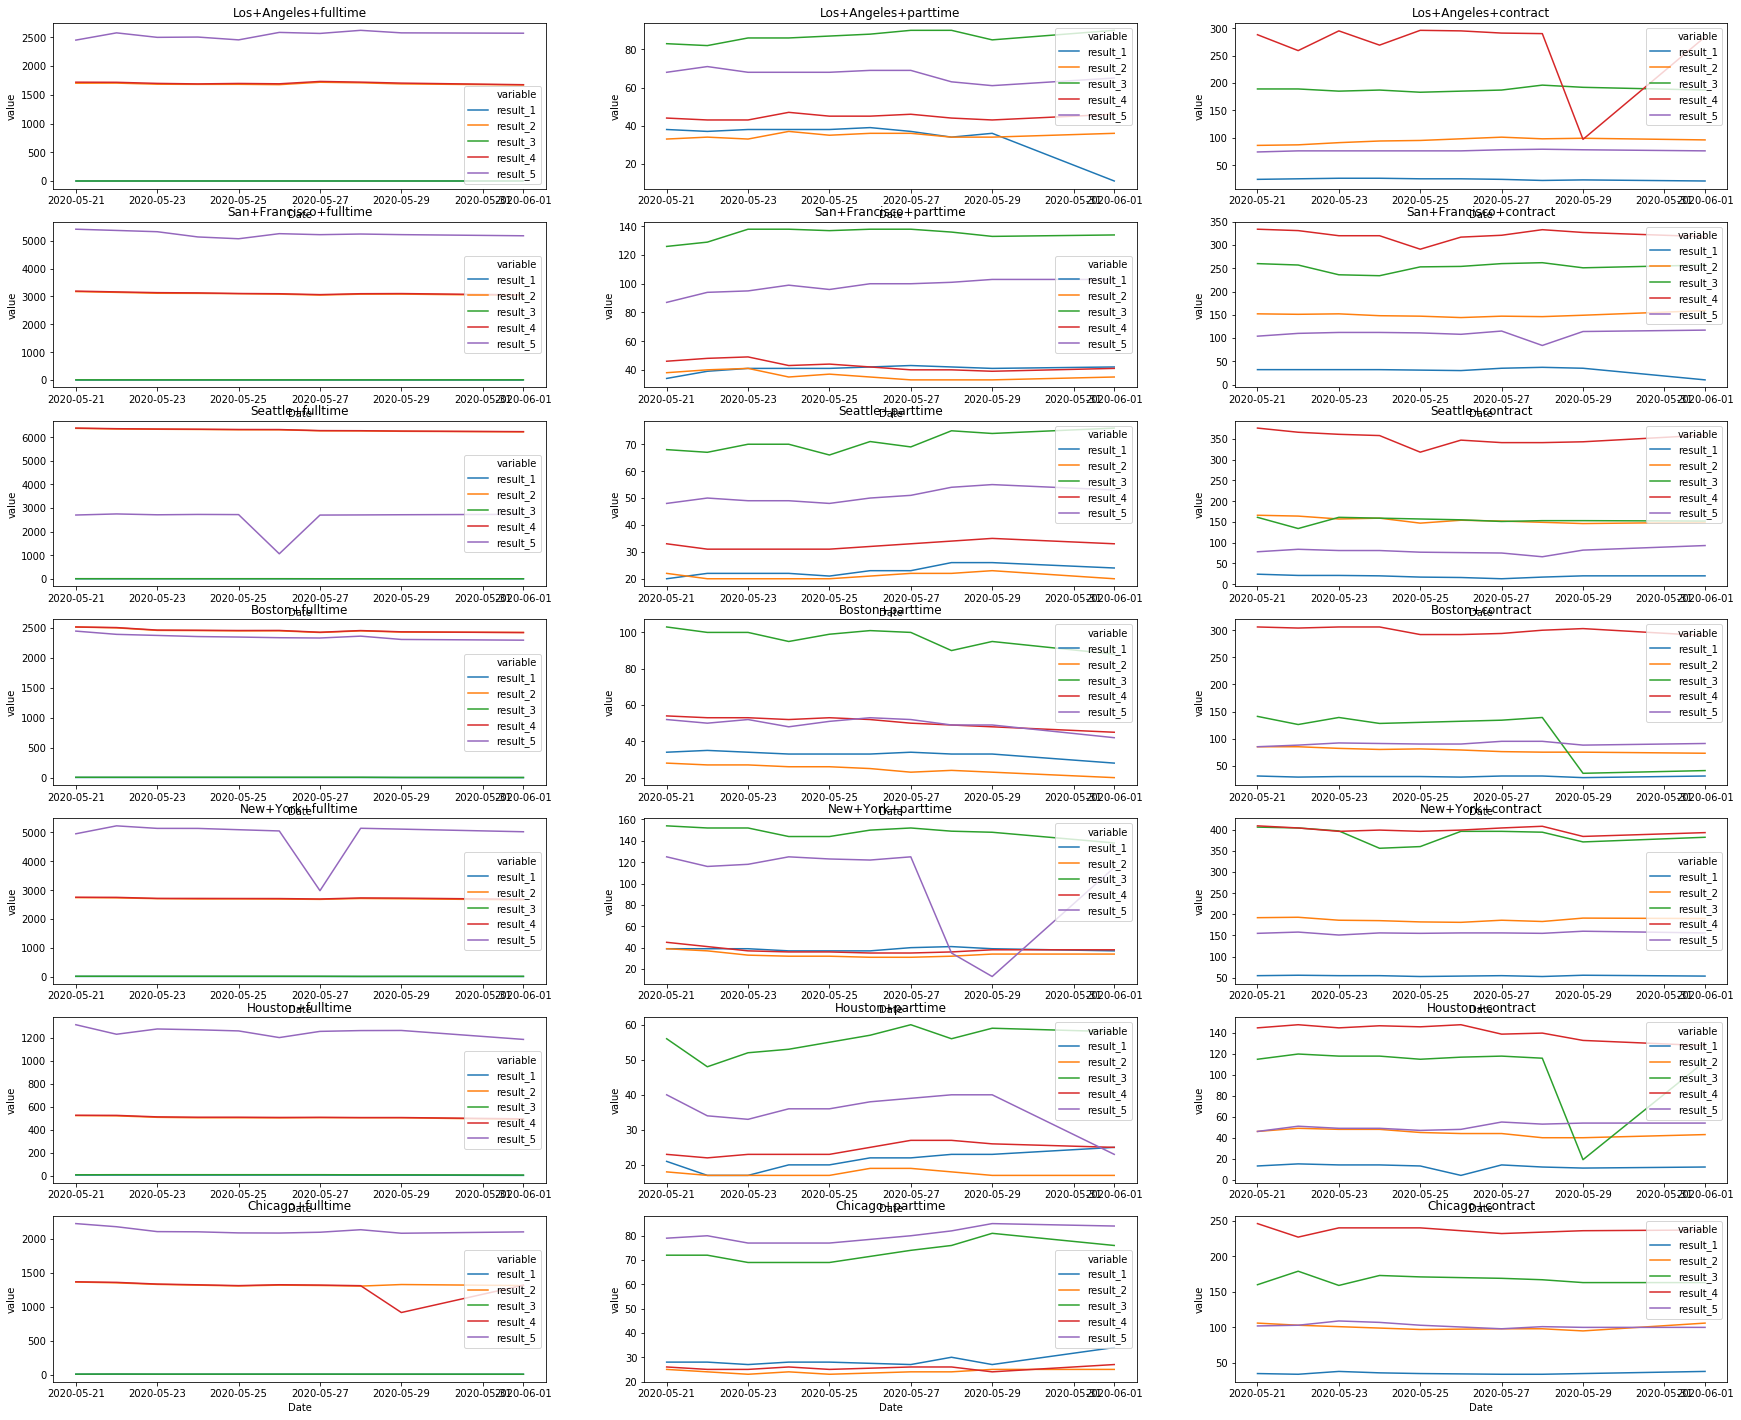

In [10]:
result = df[df['keyword']=='software+engineer'].copy()
result['col'] = result['location'] + "+" +result['job type']

city_type = result['col'].unique().tolist()

fig, axes = plt.subplots(7, 3,figsize = (30,25))

row = 0
column = 0

for i in city_type:
    sub_result = pd.melt(result[result['col']== i],id_vars=['Date'],value_vars = ['result_1','result_2','result_3','result_4','result_5'])
    sns.lineplot(x = 'Date', y = 'value', hue = 'variable',estimator = None,data=sub_result, ax = axes[row][column]).set(title = i)
    column += 1
    if column == 3:
        row += 1
        column = 0

Then, I will give out my choice of search methods based on the graphs. 

And my criteria is really simple: the lines should perform a similar trend with the normals and there should be a "sufficient but not too large" number of jobs.

After all, I will create a table based on my suggestions.

In [11]:
rec1_result = [[4],[2,3,4,5],[2,3,5],
               [4],[2,4],[2,3],
               [5],[4,5],[2,3],
               [4,5],[4,5],[2,5],
               [4],[1,2,4],[2,5],
               [4],[3],[2,5],
               [2],[3,5],[2,5]]

data = {}

for i in city_type:
    index = city_type.index(i)
    data.update({i: str(rec1_result[index])})

Rec = pd.DataFrame.from_dict(data, orient='index')

Rec['Job Info'] = Rec.index

job_type = []
location = []
for i in Rec['Job Info']:
    txt = i.split("+")
    job_type.append(txt[-1])
    if len(txt) > 2:
        city = txt[-3] + ' ' +txt[-2]
    location.append(city)

Rec['Job Type'] = job_type
Rec['Location'] = location

Rec.drop(columns = ['Job Info'])
Rec = Rec.rename(columns = {0:'Recommended Search Method'})
Rec = Rec[['Location','Job Type', 'Recommended Search Method']]
Rec.sort_values(by = ['Location','Job Type'])
Rec.reset_index(drop=True, inplace=True)

Rec

Location  Job Type Recommended Search Method
0     Los Angeles  fulltime                       [4]
1     Los Angeles  parttime              [2, 3, 4, 5]
2     Los Angeles  contract                 [2, 3, 5]
3   San Francisco  fulltime                       [4]
4   San Francisco  parttime                    [2, 4]
5   San Francisco  contract                    [2, 3]
6   San Francisco  fulltime                       [5]
7   San Francisco  parttime                    [4, 5]
8   San Francisco  contract                    [2, 3]
9   San Francisco  fulltime                    [4, 5]
10  San Francisco  parttime                    [4, 5]
11  San Francisco  contract                    [2, 5]
12       New York  fulltime                       [4]
13       New York  parttime                 [1, 2, 4]
14       New York  contract                    [2, 5]
15       New York  fulltime                       [4]
16       New York  parttime                       [3]
17       New York  contract                    [2, 5]
18       New York  fulltime                       [2]
19       New York  parttime                    [3, 5]
20       New York  contract                    [2, 5]

__Recommend based on location__

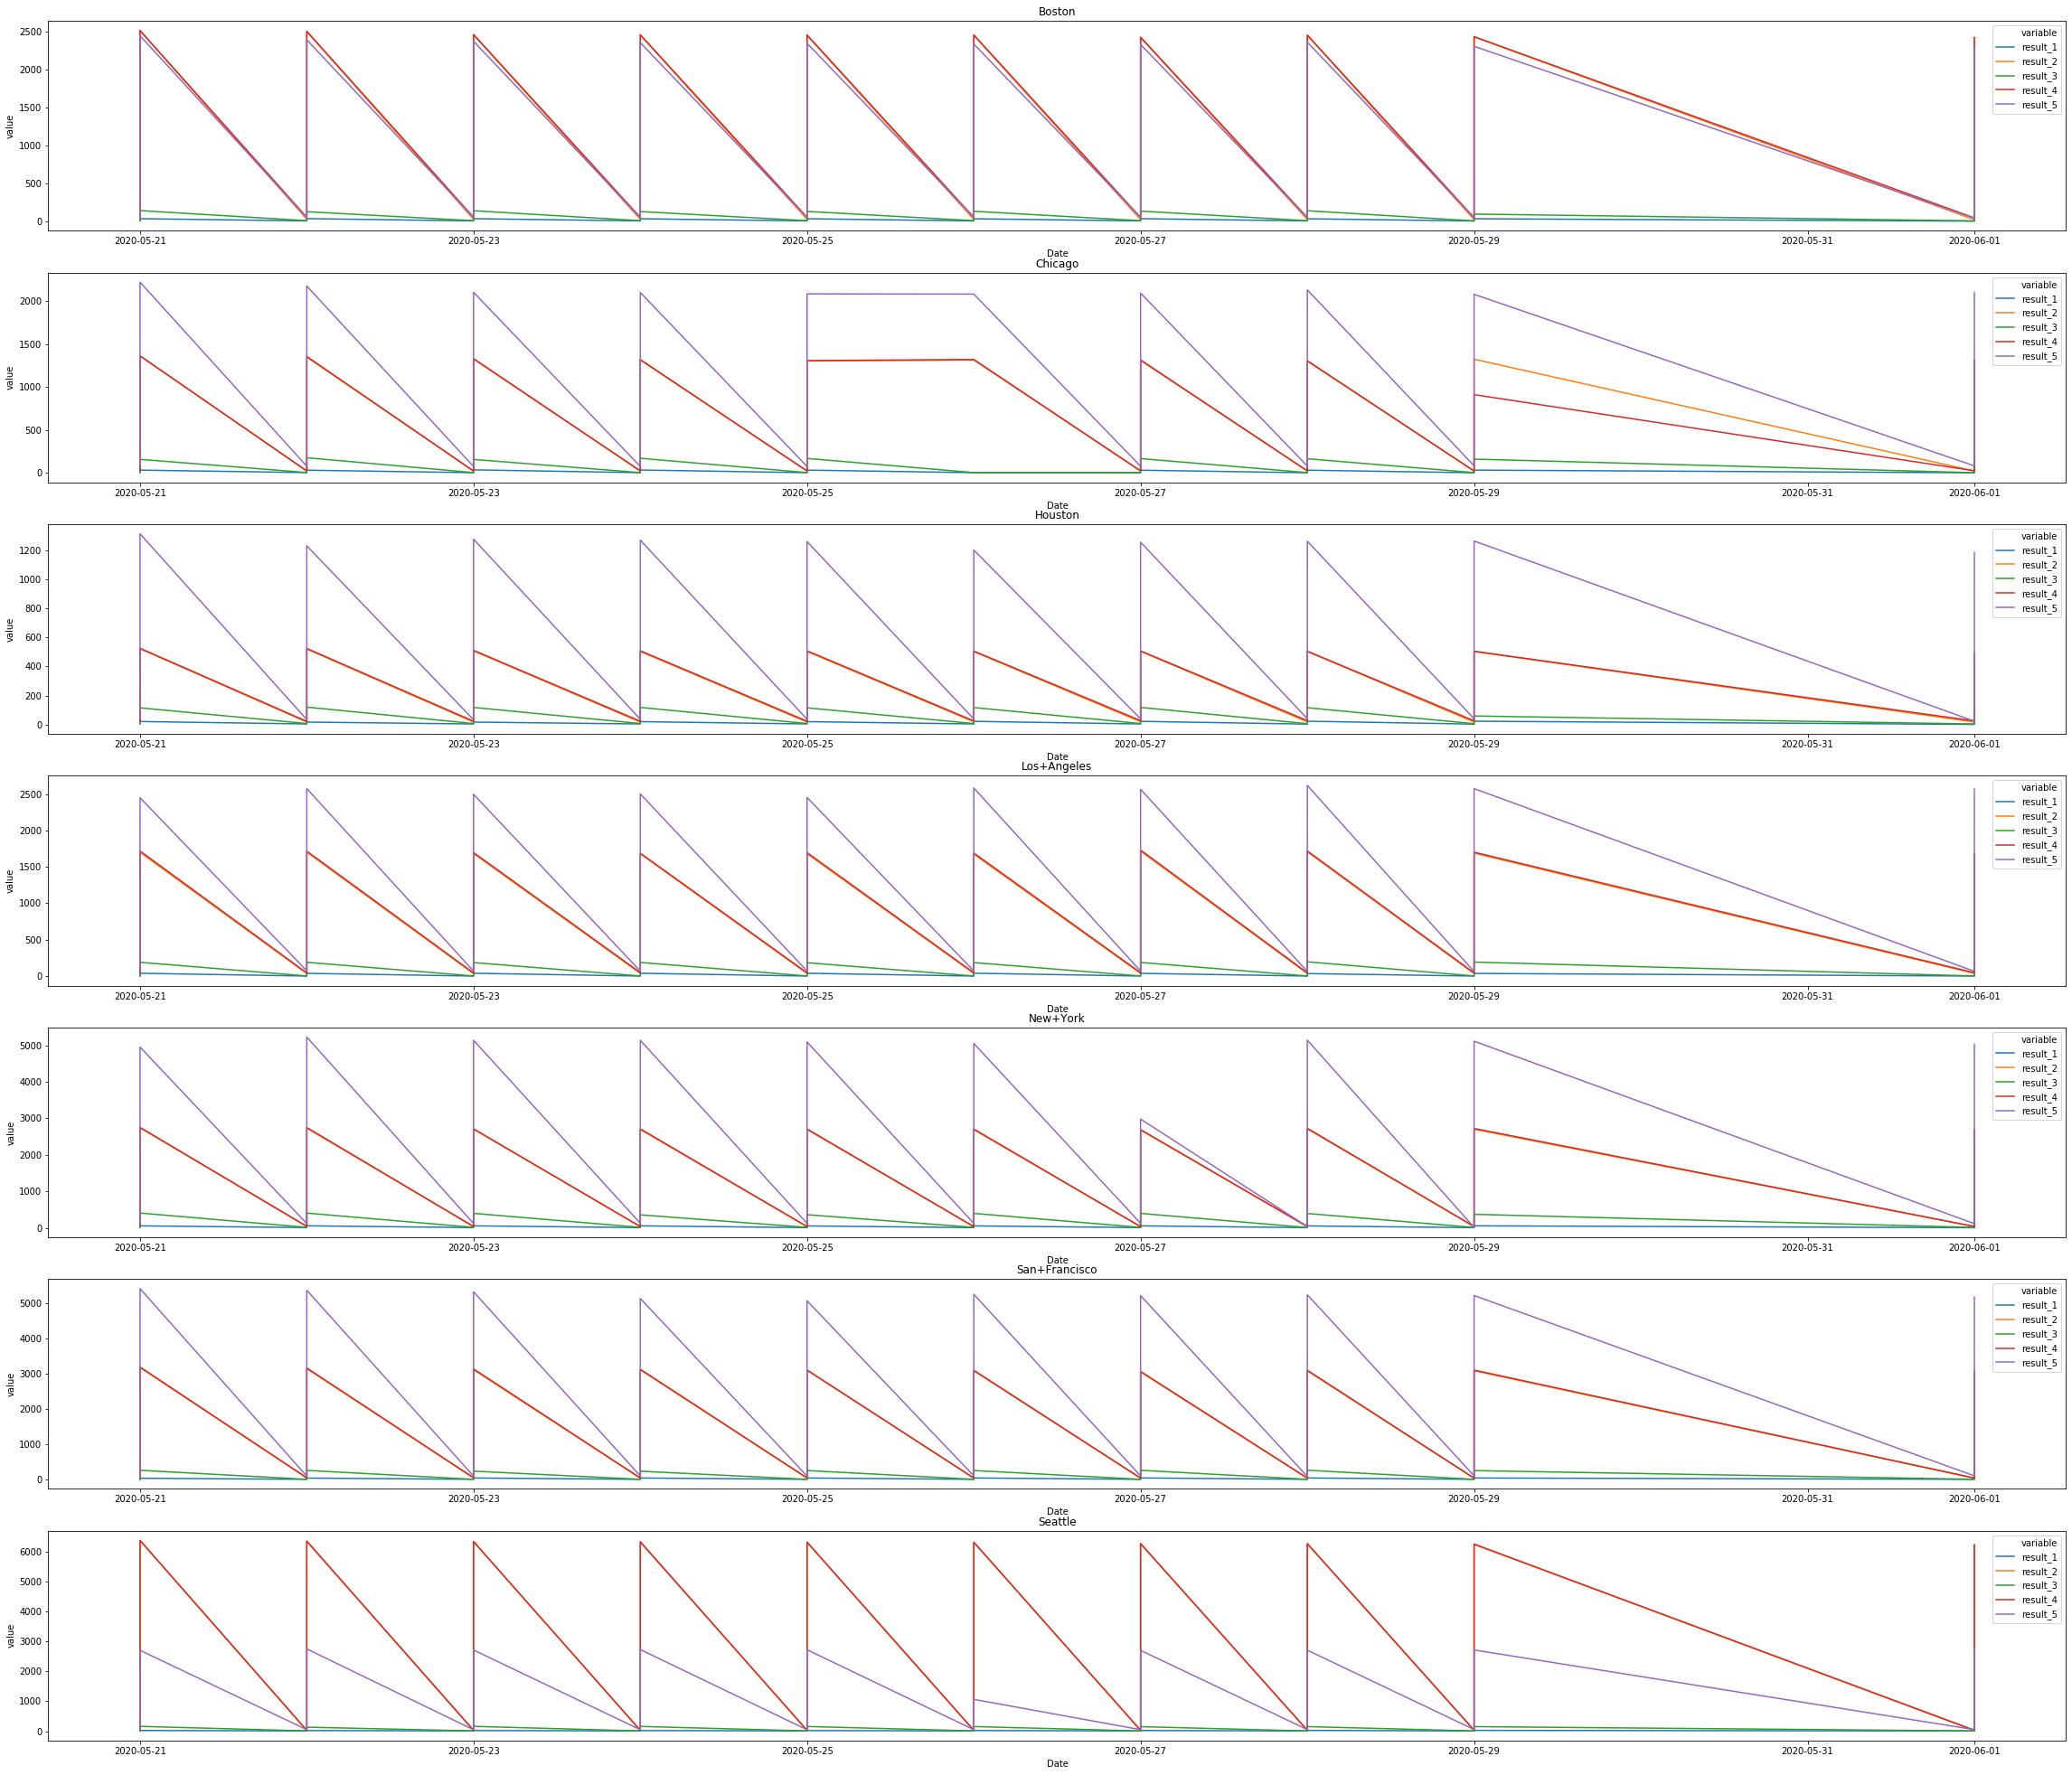

In [12]:
# Visualize the distribution of results based on location

location_result = result.groupby(['Date','location']).sum()
location_result.reset_index(inplace = True)

city = location_result['location'].unique().tolist()

fig, axes = plt.subplots(7,1,figsize = (40,35))

for i in city:
    sub_result = pd.melt(result[result['location']== i],id_vars=['Date'],
                         value_vars = ['result_1','result_2','result_3','result_4','result_5'])
    sns.lineplot(x = 'Date', y = 'value', hue = 'variable',estimator = None,data=sub_result, ax = axes[city.index(i)]).set(title = i)


Based on the graph, I would recommend 3 for job search.

__Recommendation based on job type__

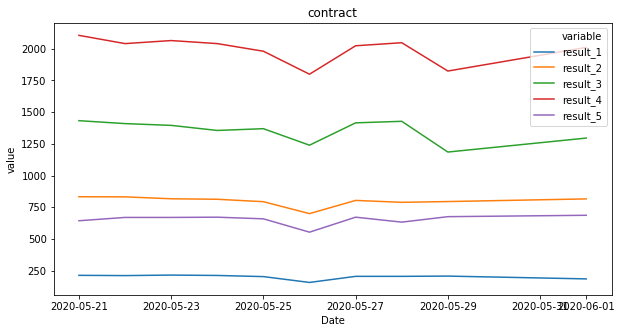

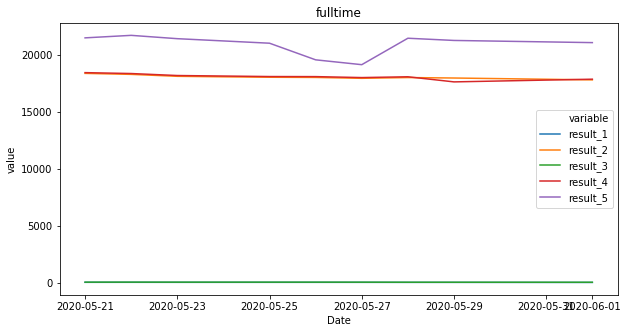

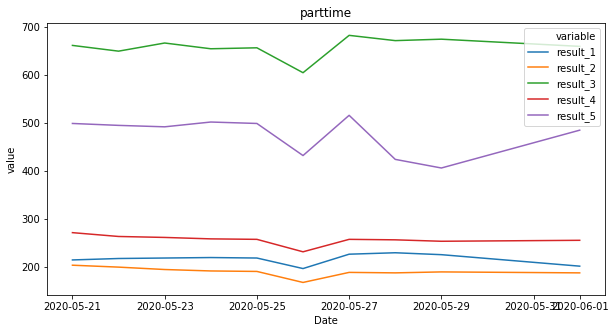

In [13]:
# Visualize the dsitribution of results based on job type

job_result = result.groupby(['Date','job type']).sum()
job_result.reset_index(inplace = True)
job_result

count = 1

for i in job_result['job type'].unique():
    plt.figure(count, figsize = (10,5))
    sub_result = pd.melt(job_result[job_result['job type']== i],id_vars=['Date'],value_vars = ['result_1','result_2','result_3','result_4','result_5'])
    sns.lineplot(x = 'Date', y = 'value', hue = 'variable',estimator = None,data=sub_result).set_title(i)
    count += 1

Based on the graphs, I would choose 2 (and probably 4) for job searching.

# Web Developer

I will start with those who have requirements of both location and job type

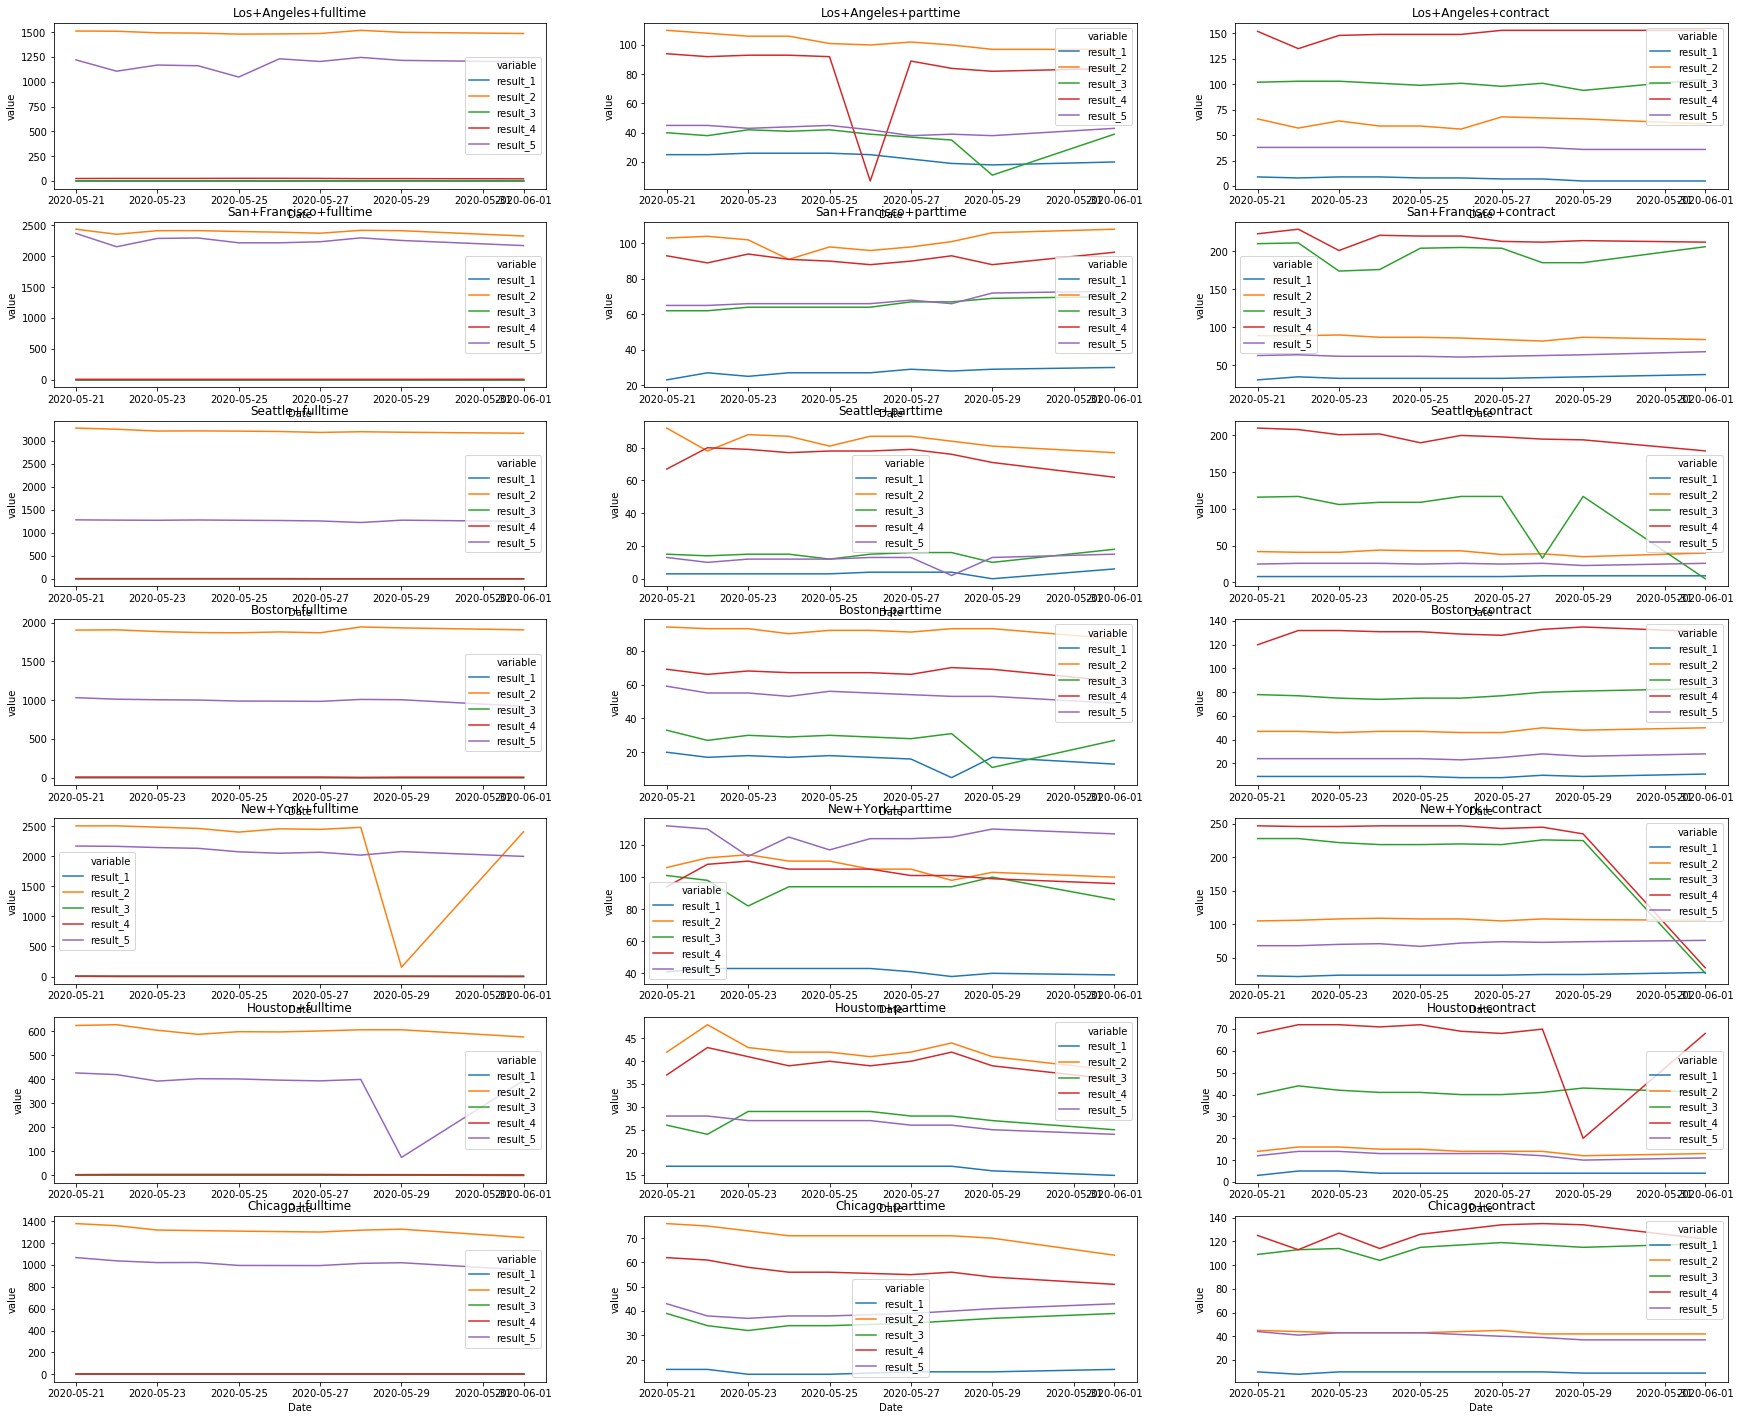

In [14]:
result = df[df['keyword']=='web+develop'].copy()
result['col'] = result['location'] + "+" +result['job type']

city_type = result['col'].unique().tolist()

fig, axes = plt.subplots(7, 3,figsize = (30,25))

row = 0
column = 0

for i in city_type:
    sub_result = pd.melt(result[result['col']== i],id_vars=['Date'],value_vars = ['result_1','result_2','result_3','result_4','result_5'])
    sns.lineplot(x = 'Date', y = 'value', hue = 'variable',estimator = None,data=sub_result, ax = axes[row][column]).set(title = i)
    column += 1
    if column == 3:
        row += 1
        column = 0

Then, I will give out my choice of search methods based on the graphs. 

And my criteria is really simple: the lines should perform a similar trend with the normals and there should be a "sufficient but not too large" number of jobs.

After all, I will create a table based on my suggestions.

In [15]:
rec1_result = [[5],[1,5],[2,5],
          [5],[3,5],[2,5],
          [5],[3],[2,5],
          [5],[4,5],[2,3,5],
          [5],[2,4],[2,5],
          [2],[3,5],[2,3,5],
          [5],[3,5],[2,5]]

data = {}

for i in city_type:
    index = city_type.index(i)
    data.update({i: str(rec1_result[index])})

Rec = pd.DataFrame.from_dict(data, orient='index')

Rec['Job Info'] = Rec.index

job_type = []
location = []
for i in Rec['Job Info']:
    txt = i.split("+")
    job_type.append(txt[-1])
    if len(txt) > 2:
        city = txt[-3] + ' ' +txt[-2]
    location.append(city)

Rec['Job Type'] = job_type
Rec['Location'] = location

Rec.drop(columns = ['Job Info'])
Rec = Rec.rename(columns = {0:'Recommended Search Method'})
Rec = Rec[['Location','Job Type', 'Recommended Search Method']]
Rec.sort_values(by = ['Location','Job Type'])
Rec.reset_index(drop=True, inplace=True)

Rec

Location  Job Type Recommended Search Method
0     Los Angeles  fulltime                       [5]
1     Los Angeles  parttime                    [1, 5]
2     Los Angeles  contract                    [2, 5]
3   San Francisco  fulltime                       [5]
4   San Francisco  parttime                    [3, 5]
5   San Francisco  contract                    [2, 5]
6   San Francisco  fulltime                       [5]
7   San Francisco  parttime                       [3]
8   San Francisco  contract                    [2, 5]
9   San Francisco  fulltime                       [5]
10  San Francisco  parttime                    [4, 5]
11  San Francisco  contract                 [2, 3, 5]
12       New York  fulltime                       [5]
13       New York  parttime                    [2, 4]
14       New York  contract                    [2, 5]
15       New York  fulltime                       [2]
16       New York  parttime                    [3, 5]
17       New York  contract                 [2, 3, 5]
18       New York  fulltime                       [5]
19       New York  parttime                    [3, 5]
20       New York  contract                    [2, 5]

__Recommend based on location__

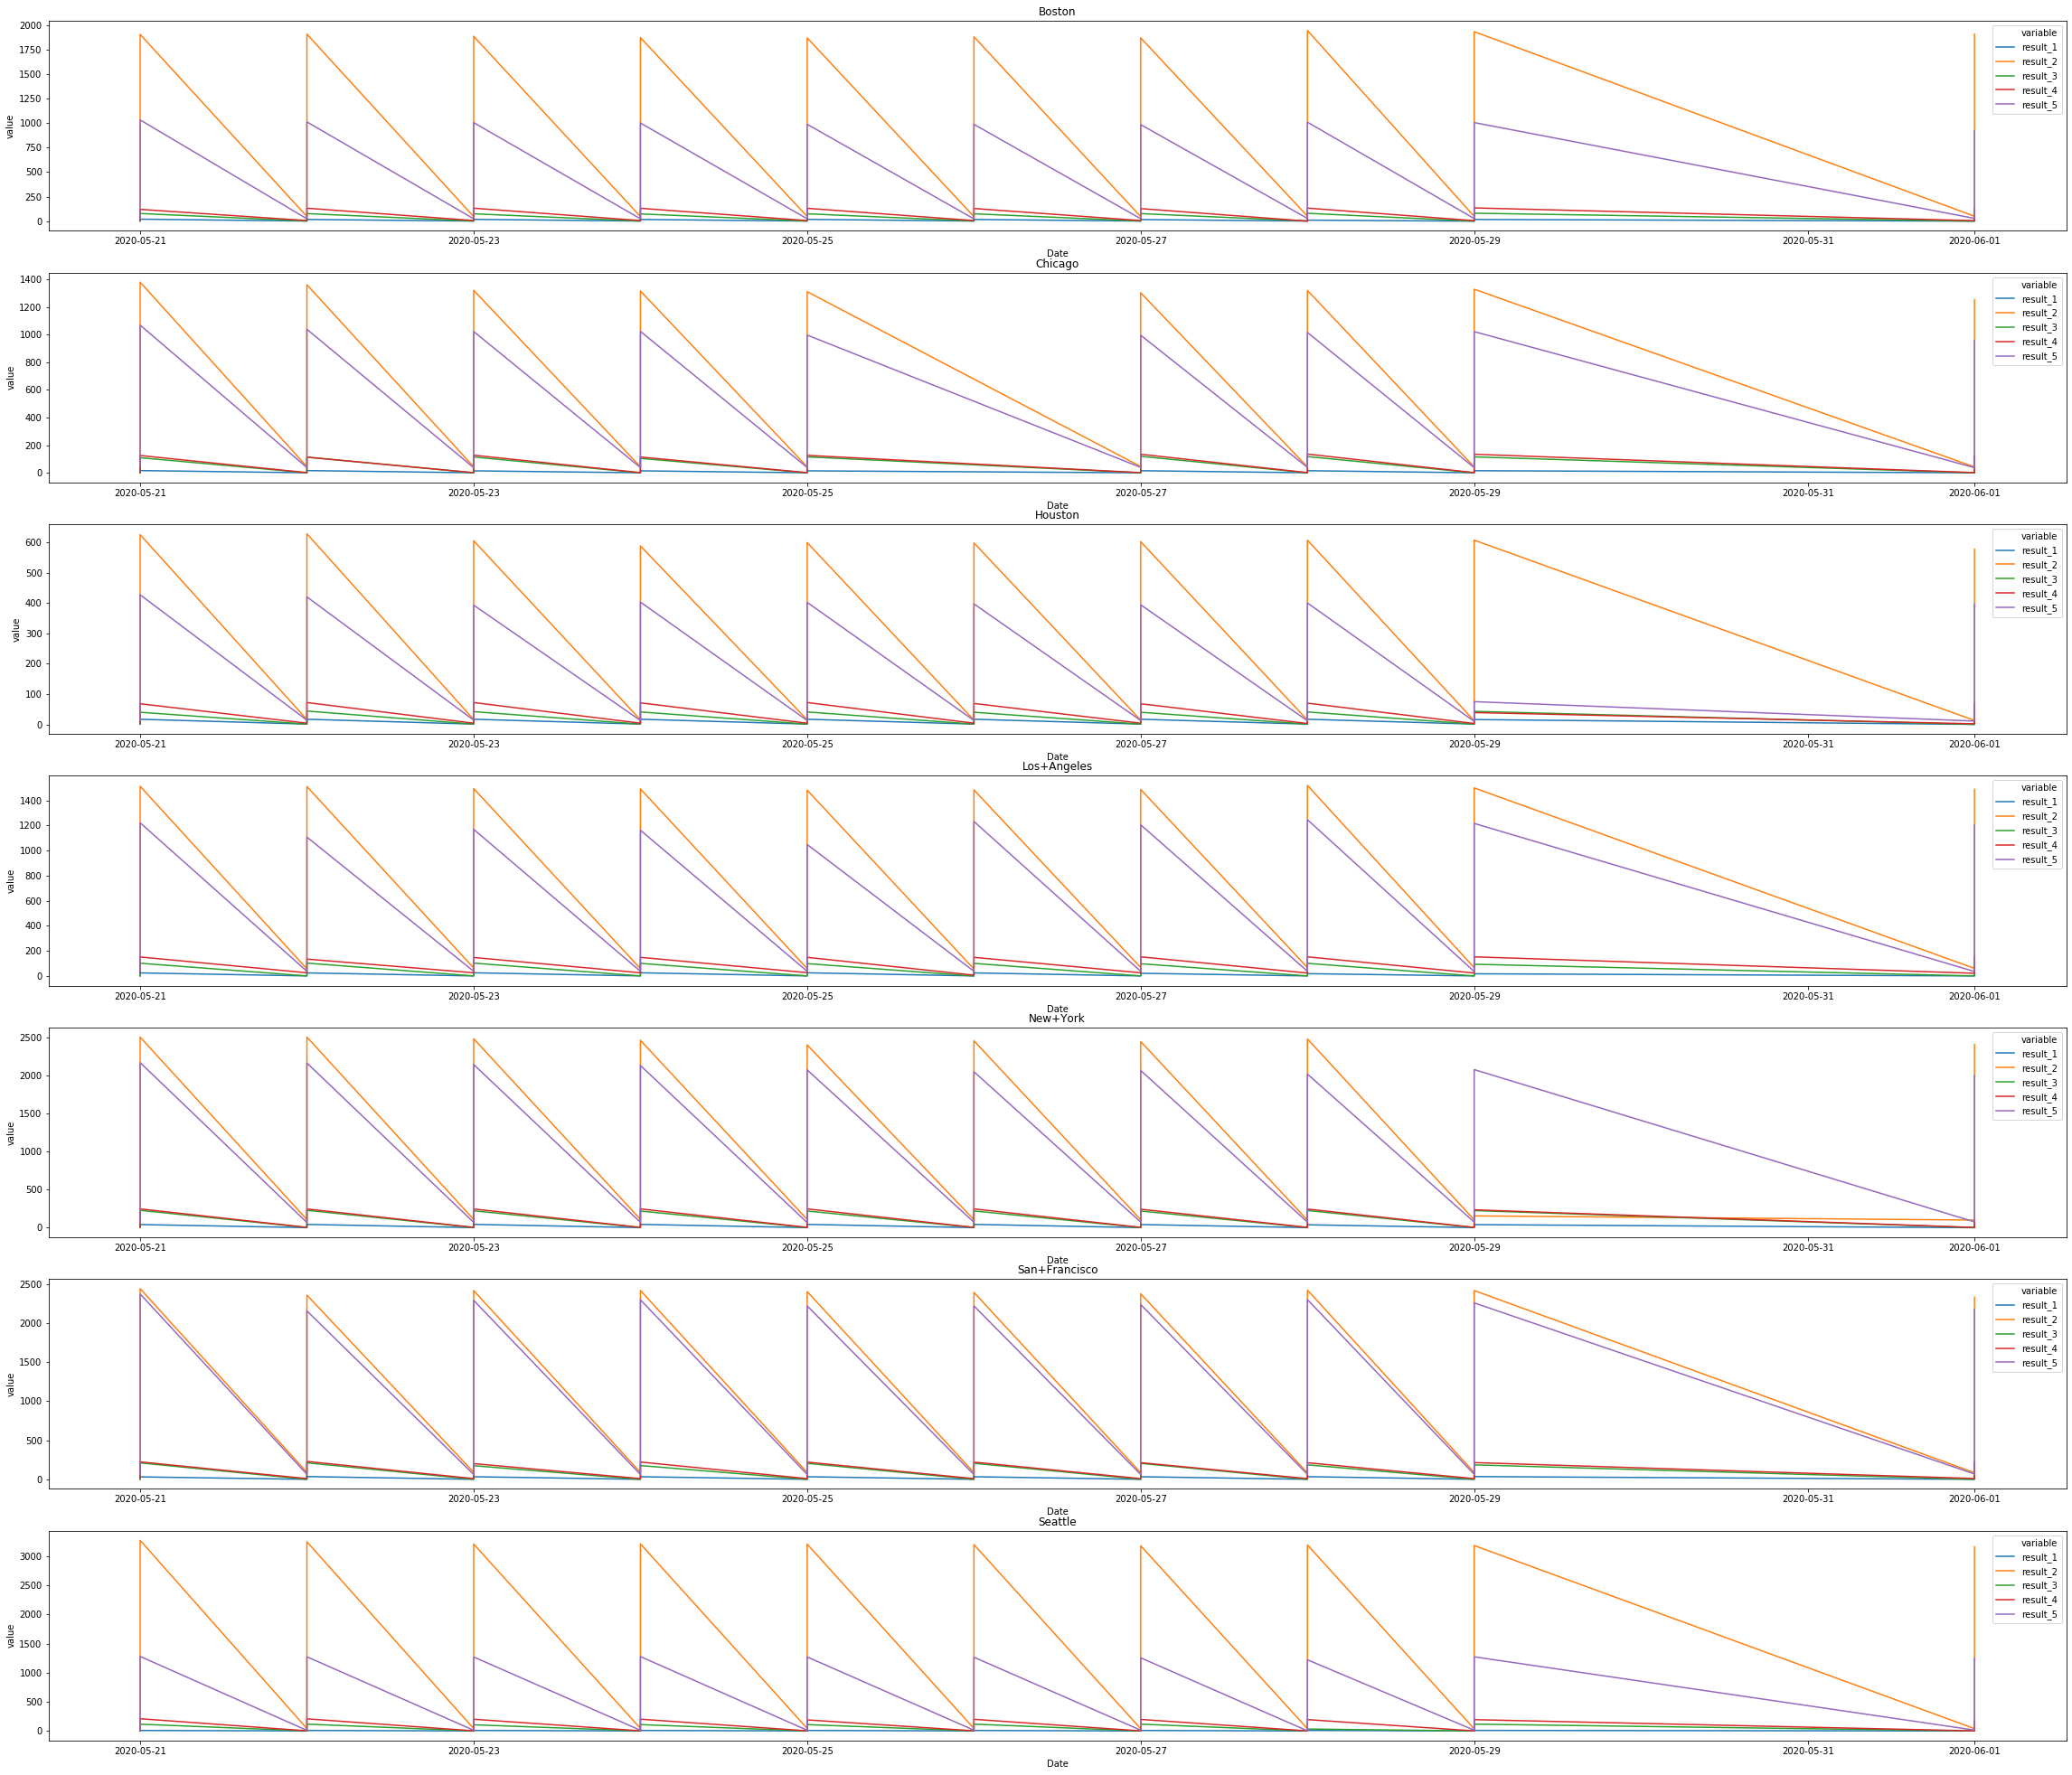

In [16]:
# Visualize the distribution of results based on location

location_result = result.groupby(['Date','location']).sum()
location_result.reset_index(inplace = True)

city = location_result['location'].unique().tolist()

fig, axes = plt.subplots(7,1,figsize = (40,35))

for i in city:
    sub_result = pd.melt(result[result['location']== i],id_vars=['Date'],
                         value_vars = ['result_1','result_2','result_3','result_4','result_5'])
    sns.lineplot(x = 'Date', y = 'value', hue = 'variable',estimator = None,data=sub_result, ax = axes[city.index(i)]).set(title = i)


Based on the graph, I would recommend 3 and 4 for job search.

__Recommendation based on job type__

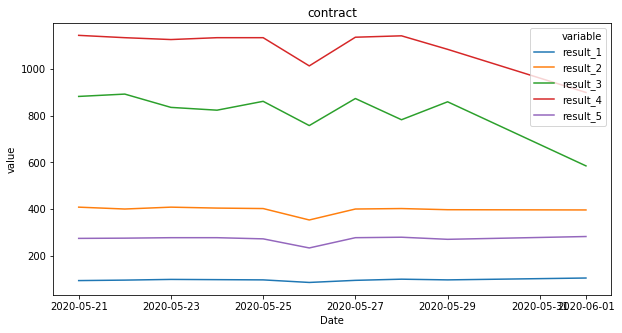

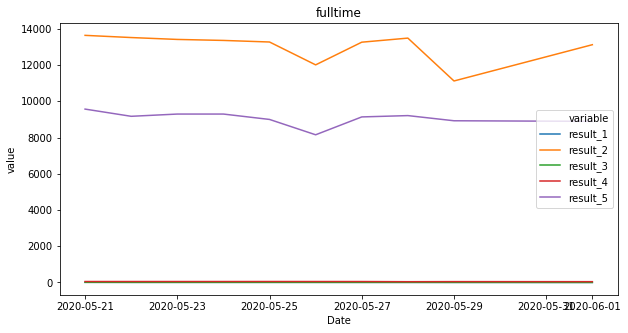

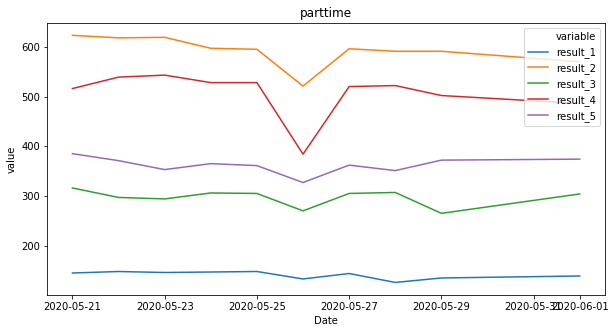

In [17]:
# Visualize the dsitribution of results based on job type

job_result = result.groupby(['Date','job type']).sum()
job_result.reset_index(inplace = True)
job_result

count = 1

for i in job_result['job type'].unique():
    plt.figure(count, figsize = (10,5))
    sub_result = pd.melt(job_result[job_result['job type']== i],id_vars=['Date'],value_vars = ['result_1','result_2','result_3','result_4','result_5'])
    sns.lineplot(x = 'Date', y = 'value', hue = 'variable',estimator = None,data=sub_result).set_title(i)
    count += 1

Based on the graphs, I would choose 5 (and probably 2) for job searching.

# Finance

I will start with those who have requirements of both location and job type

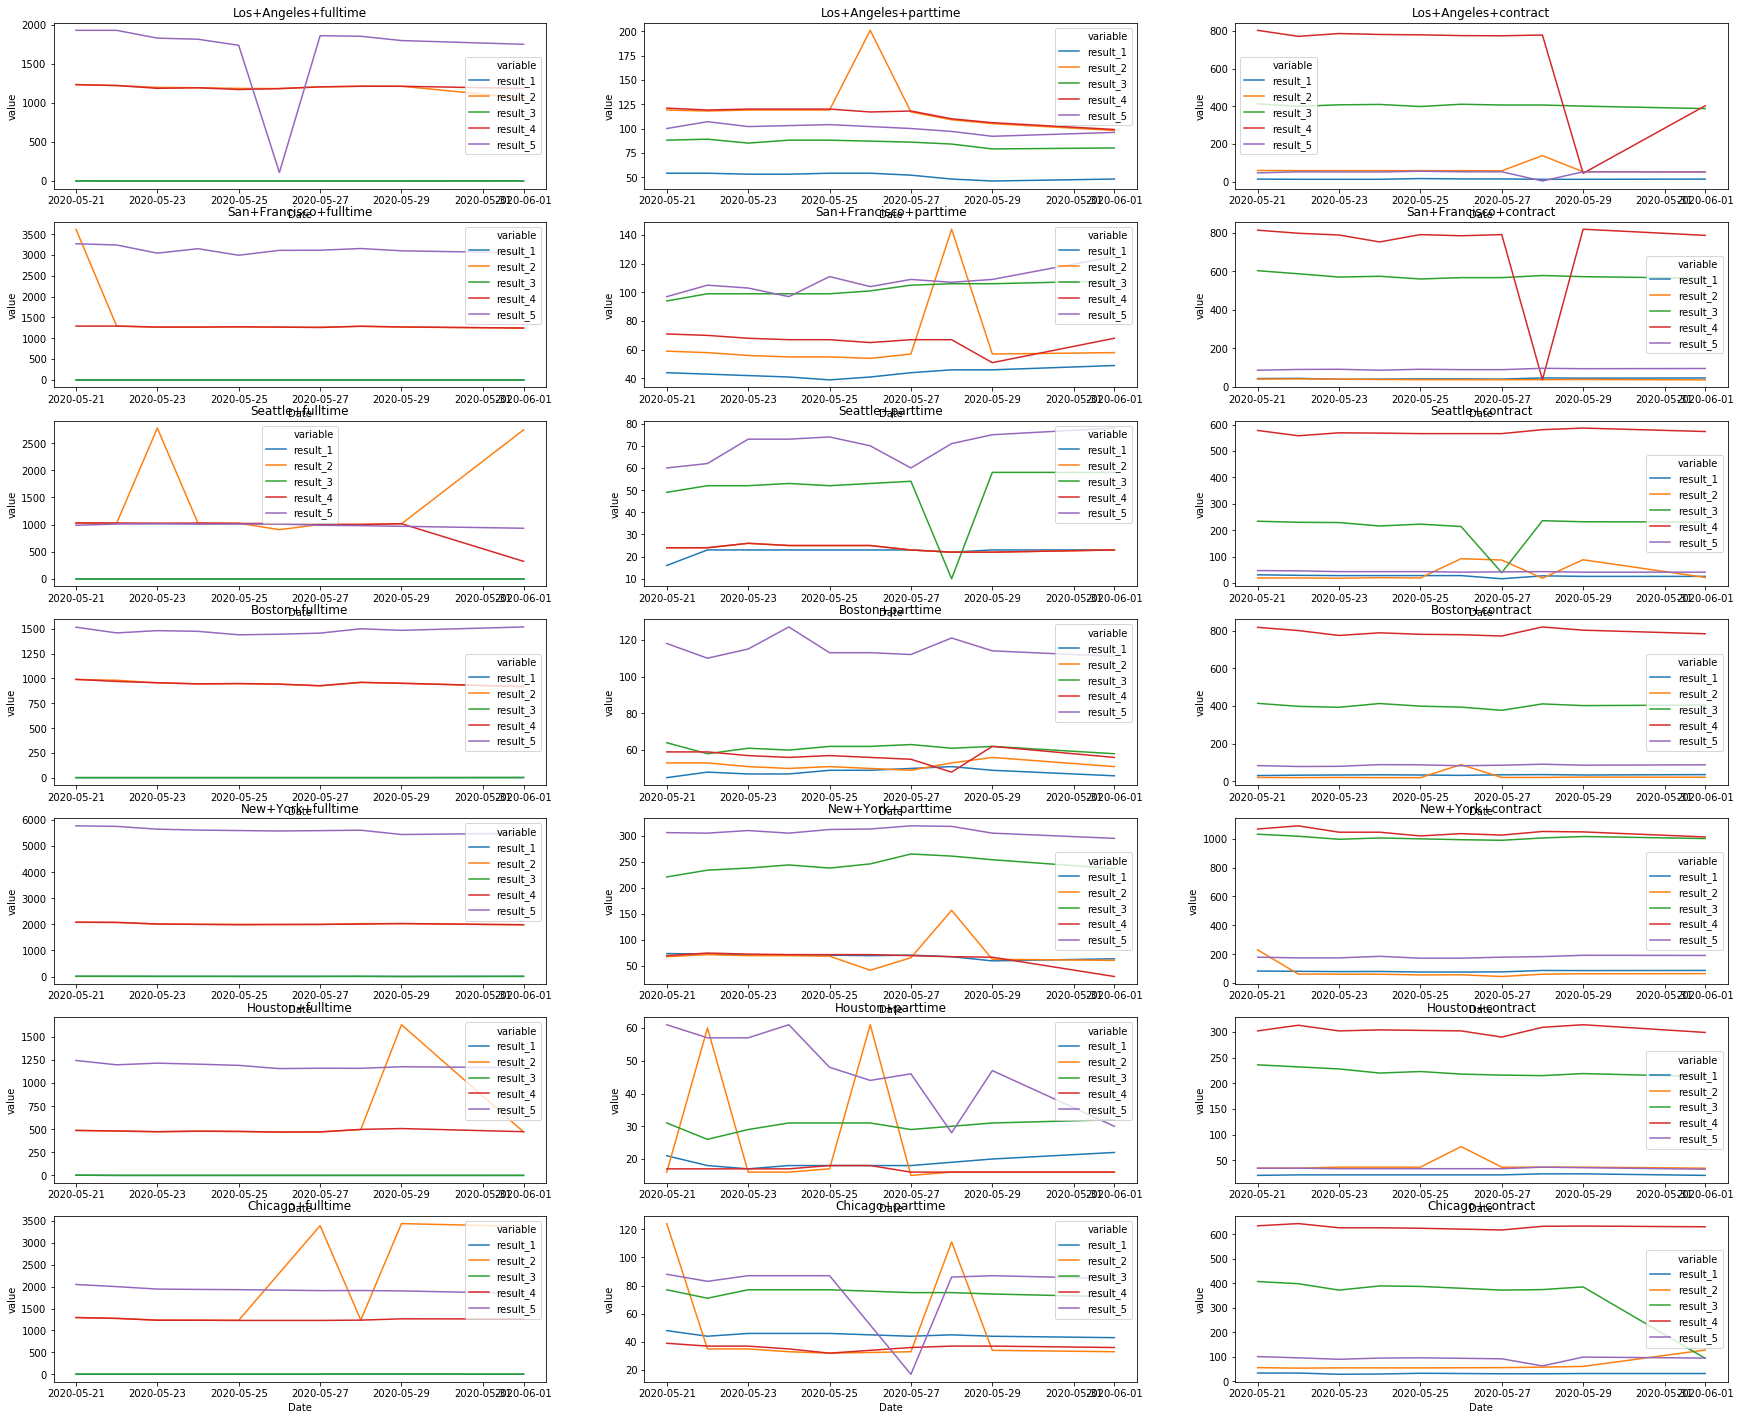

In [18]:
result = df[df['keyword']=='finance'].copy()
result['col'] = result['location'] + "+" +result['job type']

city_type = result['col'].unique().tolist()

fig, axes = plt.subplots(7, 3,figsize = (30,25))

row = 0
column = 0

for i in city_type:
    sub_result = pd.melt(result[result['col']== i],id_vars=['Date'],value_vars = ['result_1','result_2','result_3','result_4','result_5'])
    sns.lineplot(x = 'Date', y = 'value', hue = 'variable',estimator = None,data=sub_result, ax = axes[row][column]).set(title = i)
    column += 1
    if column == 3:
        row += 1
        column = 0

Then, I will give out my choice of search methods based on the graphs. 

And my criteria is really simple: the lines should perform a similar trend with the normals and there should be a "sufficient but not too large" number of jobs.

After all, I will create a table based on my suggestions.

In [19]:
rec1_result = [[2,4],[3,5],[3],
          [4],[3,5],[3,5],
          [5],[4],[1],
          [4],[2,3],[3],
          [4],[2,4],[5],
          [4],[3],[3],
          [4],[1,3],[3,5]]

data = {}

for i in city_type:
    index = city_type.index(i)
    data.update({i: str(rec1_result[index])})

Rec = pd.DataFrame.from_dict(data, orient='index')

Rec['Job Info'] = Rec.index

job_type = []
location = []
for i in Rec['Job Info']:
    txt = i.split("+")
    job_type.append(txt[-1])
    if len(txt) > 2:
        city = txt[-3] + ' ' +txt[-2]
    location.append(city)

Rec['Job Type'] = job_type
Rec['Location'] = location

Rec.drop(columns = ['Job Info'])
Rec = Rec.rename(columns = {0:'Recommended Search Method'})
Rec = Rec[['Location','Job Type', 'Recommended Search Method']]
Rec.sort_values(by = ['Location','Job Type'])
Rec.reset_index(drop=True, inplace=True)

Rec

Location  Job Type Recommended Search Method
0     Los Angeles  fulltime                    [2, 4]
1     Los Angeles  parttime                    [3, 5]
2     Los Angeles  contract                       [3]
3   San Francisco  fulltime                       [4]
4   San Francisco  parttime                    [3, 5]
5   San Francisco  contract                    [3, 5]
6   San Francisco  fulltime                       [5]
7   San Francisco  parttime                       [4]
8   San Francisco  contract                       [1]
9   San Francisco  fulltime                       [4]
10  San Francisco  parttime                    [2, 3]
11  San Francisco  contract                       [3]
12       New York  fulltime                       [4]
13       New York  parttime                    [2, 4]
14       New York  contract                       [5]
15       New York  fulltime                       [4]
16       New York  parttime                       [3]
17       New York  contract                       [3]
18       New York  fulltime                       [4]
19       New York  parttime                    [1, 3]
20       New York  contract                    [3, 5]

__Recommend based on location__

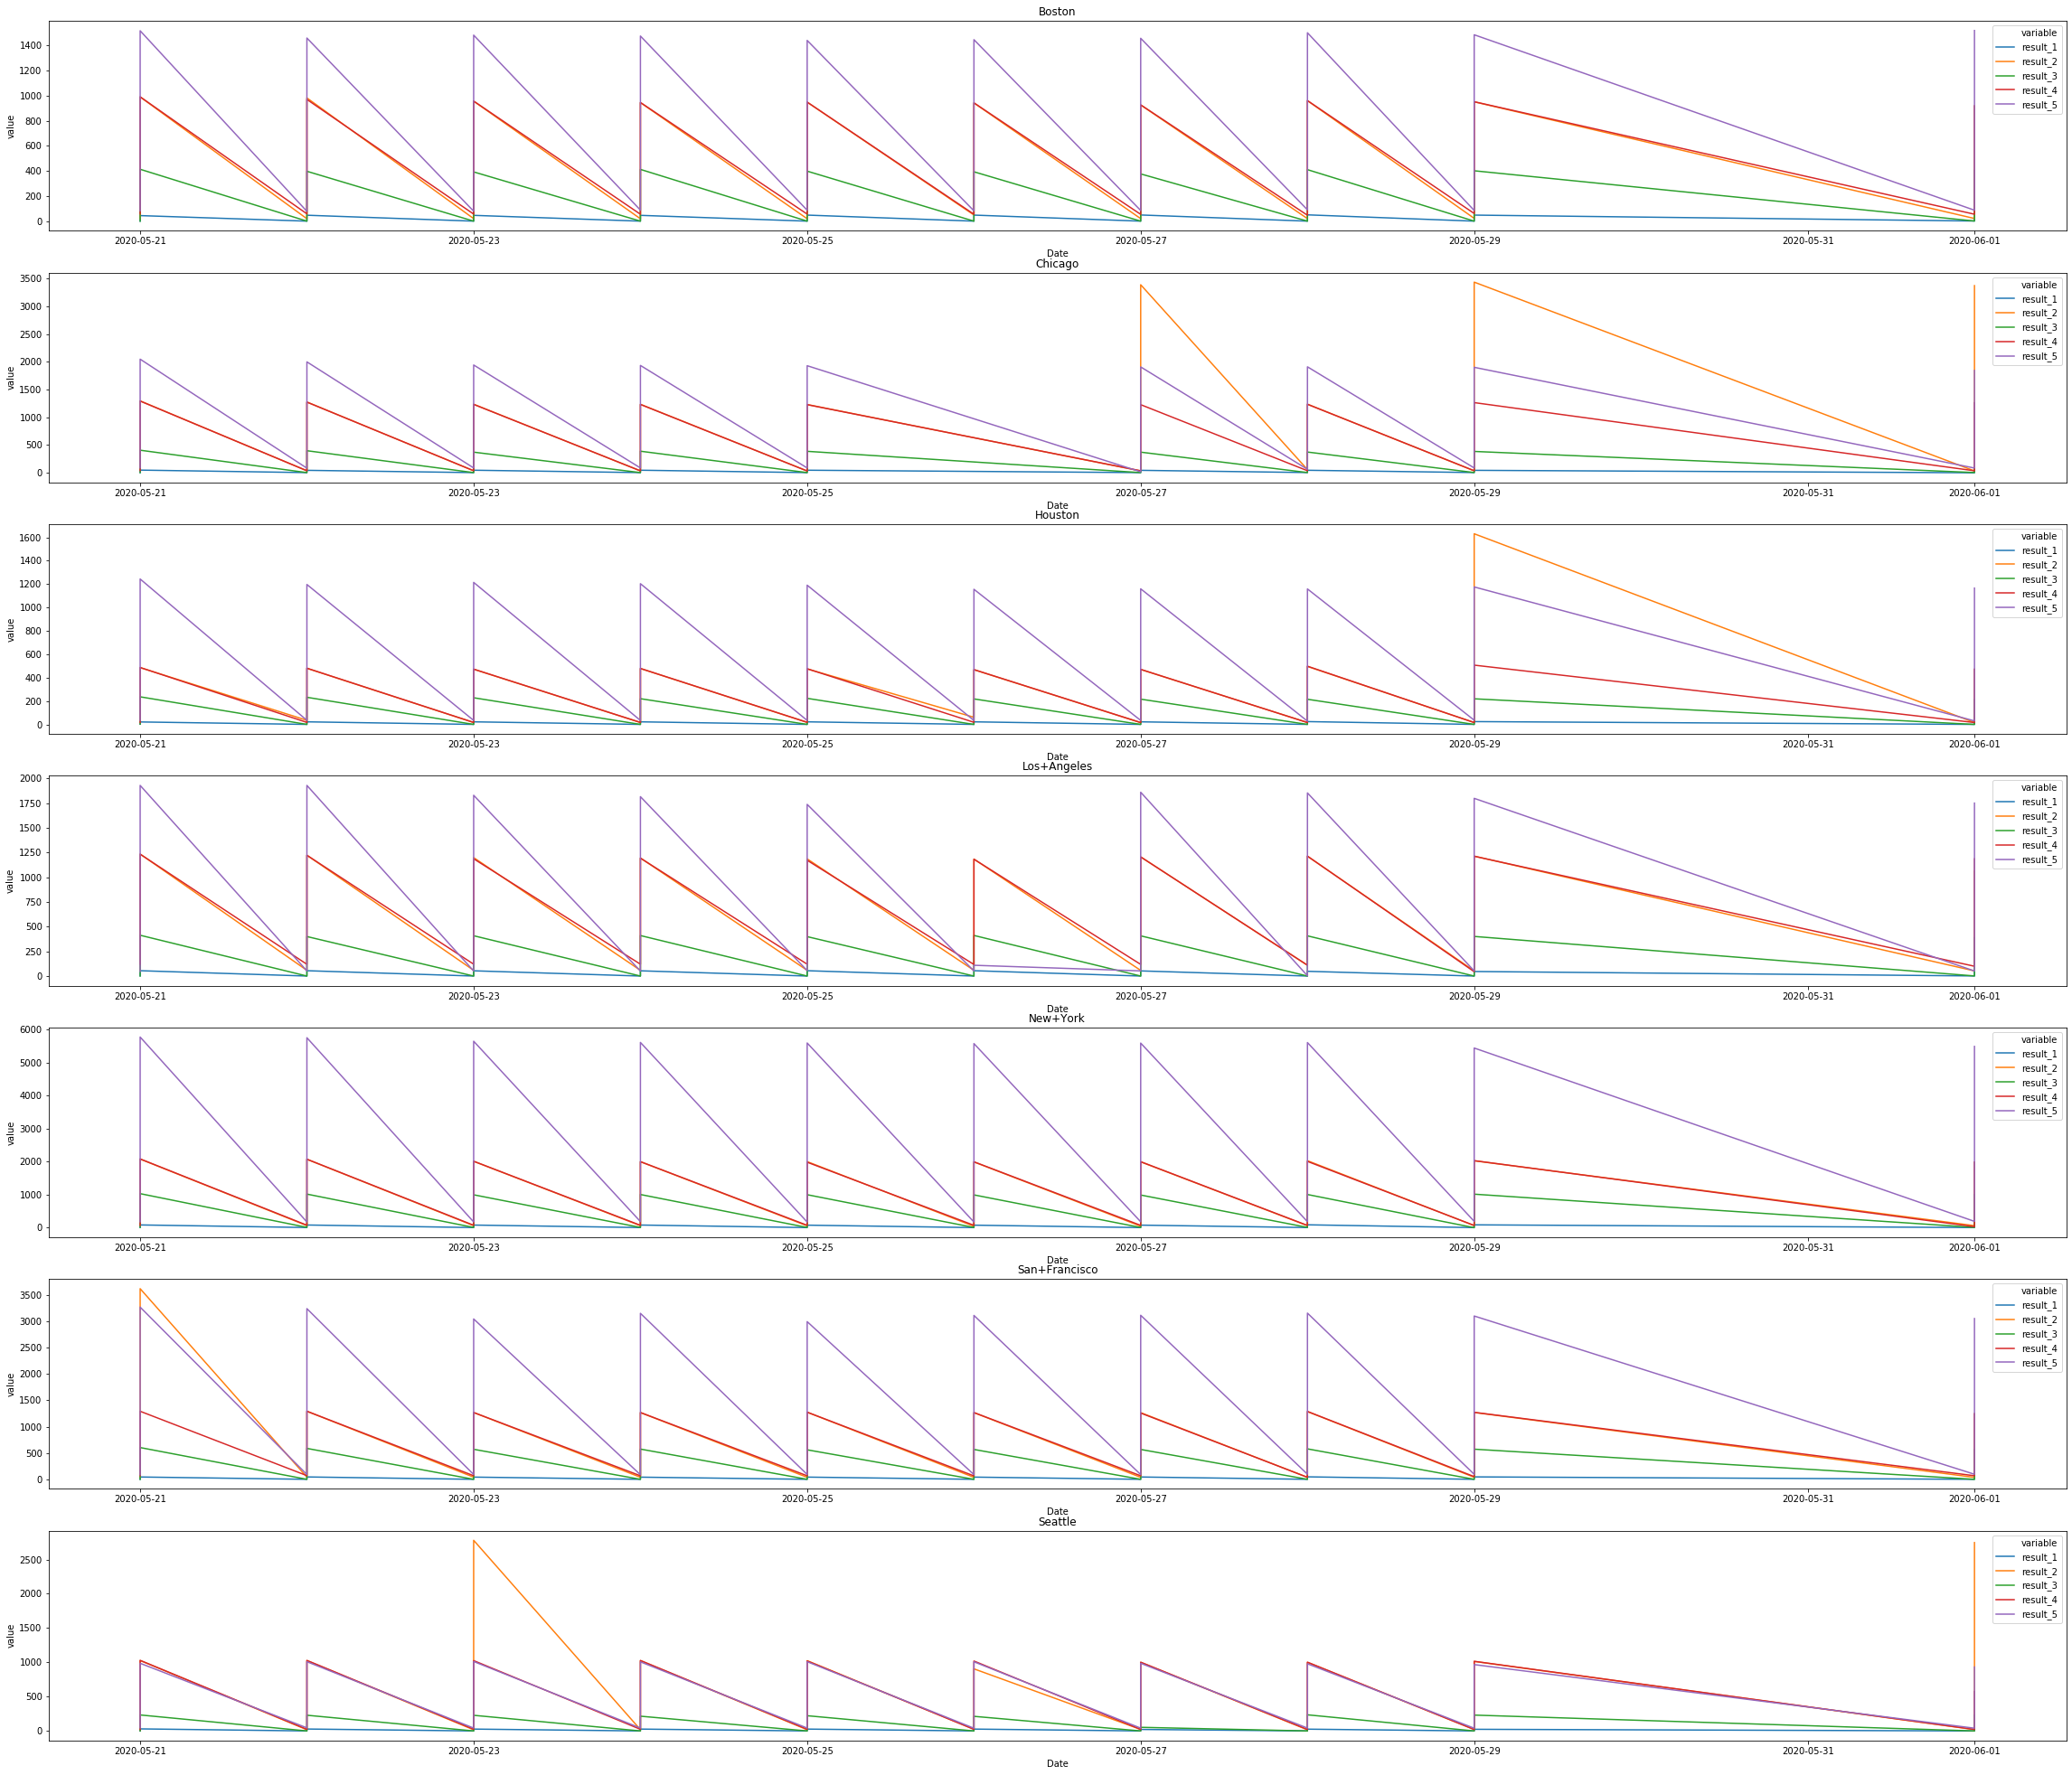

In [20]:
# Visualize the distribution of results based on location

location_result = result.groupby(['Date','location']).sum()
location_result.reset_index(inplace = True)

city = location_result['location'].unique().tolist()

fig, axes = plt.subplots(7,1,figsize = (40,35))

for i in city:
    sub_result = pd.melt(result[result['location']== i],id_vars=['Date'],
                         value_vars = ['result_1','result_2','result_3','result_4','result_5'])
    sns.lineplot(x = 'Date', y = 'value', hue = 'variable',estimator = None,data=sub_result, ax = axes[city.index(i)]).set(title = i)


Based on the graph, I would recommend 3 for job search.

__Recommendation based on job type__

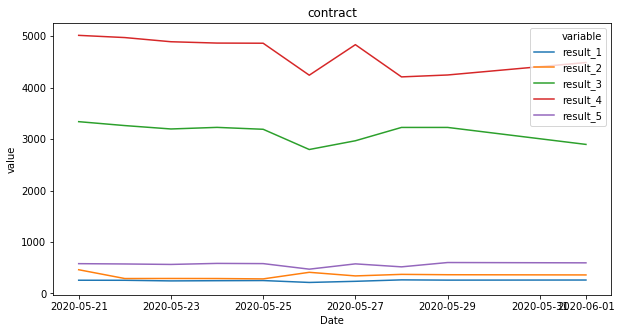

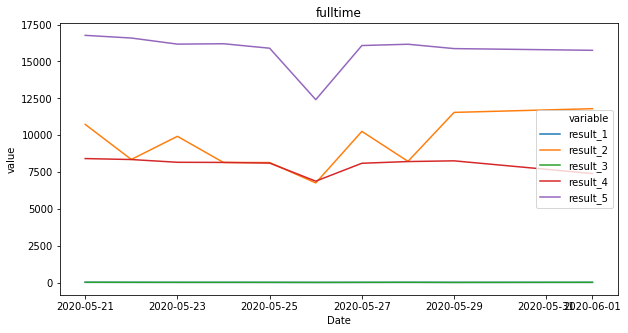

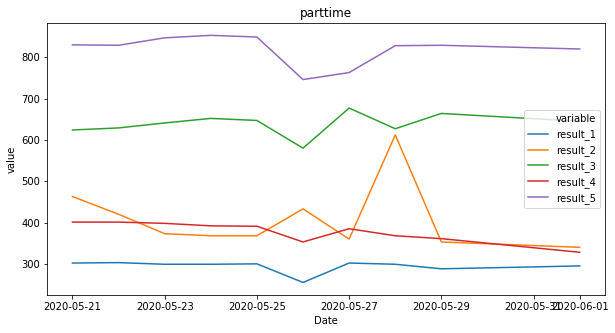

In [21]:
# Visualize the dsitribution of results based on job type

job_result = result.groupby(['Date','job type']).sum()
job_result.reset_index(inplace = True)
job_result

count = 1

for i in job_result['job type'].unique():
    plt.figure(count, figsize = (10,5))
    sub_result = pd.melt(job_result[job_result['job type']== i],id_vars=['Date'],value_vars = ['result_1','result_2','result_3','result_4','result_5'])
    sns.lineplot(x = 'Date', y = 'value', hue = 'variable',estimator = None,data=sub_result).set_title(i)
    count += 1

Based on the graphs, I would choose 2 and 4 for job searching.

# Audit

I will start with those who have requirements of both location and job type

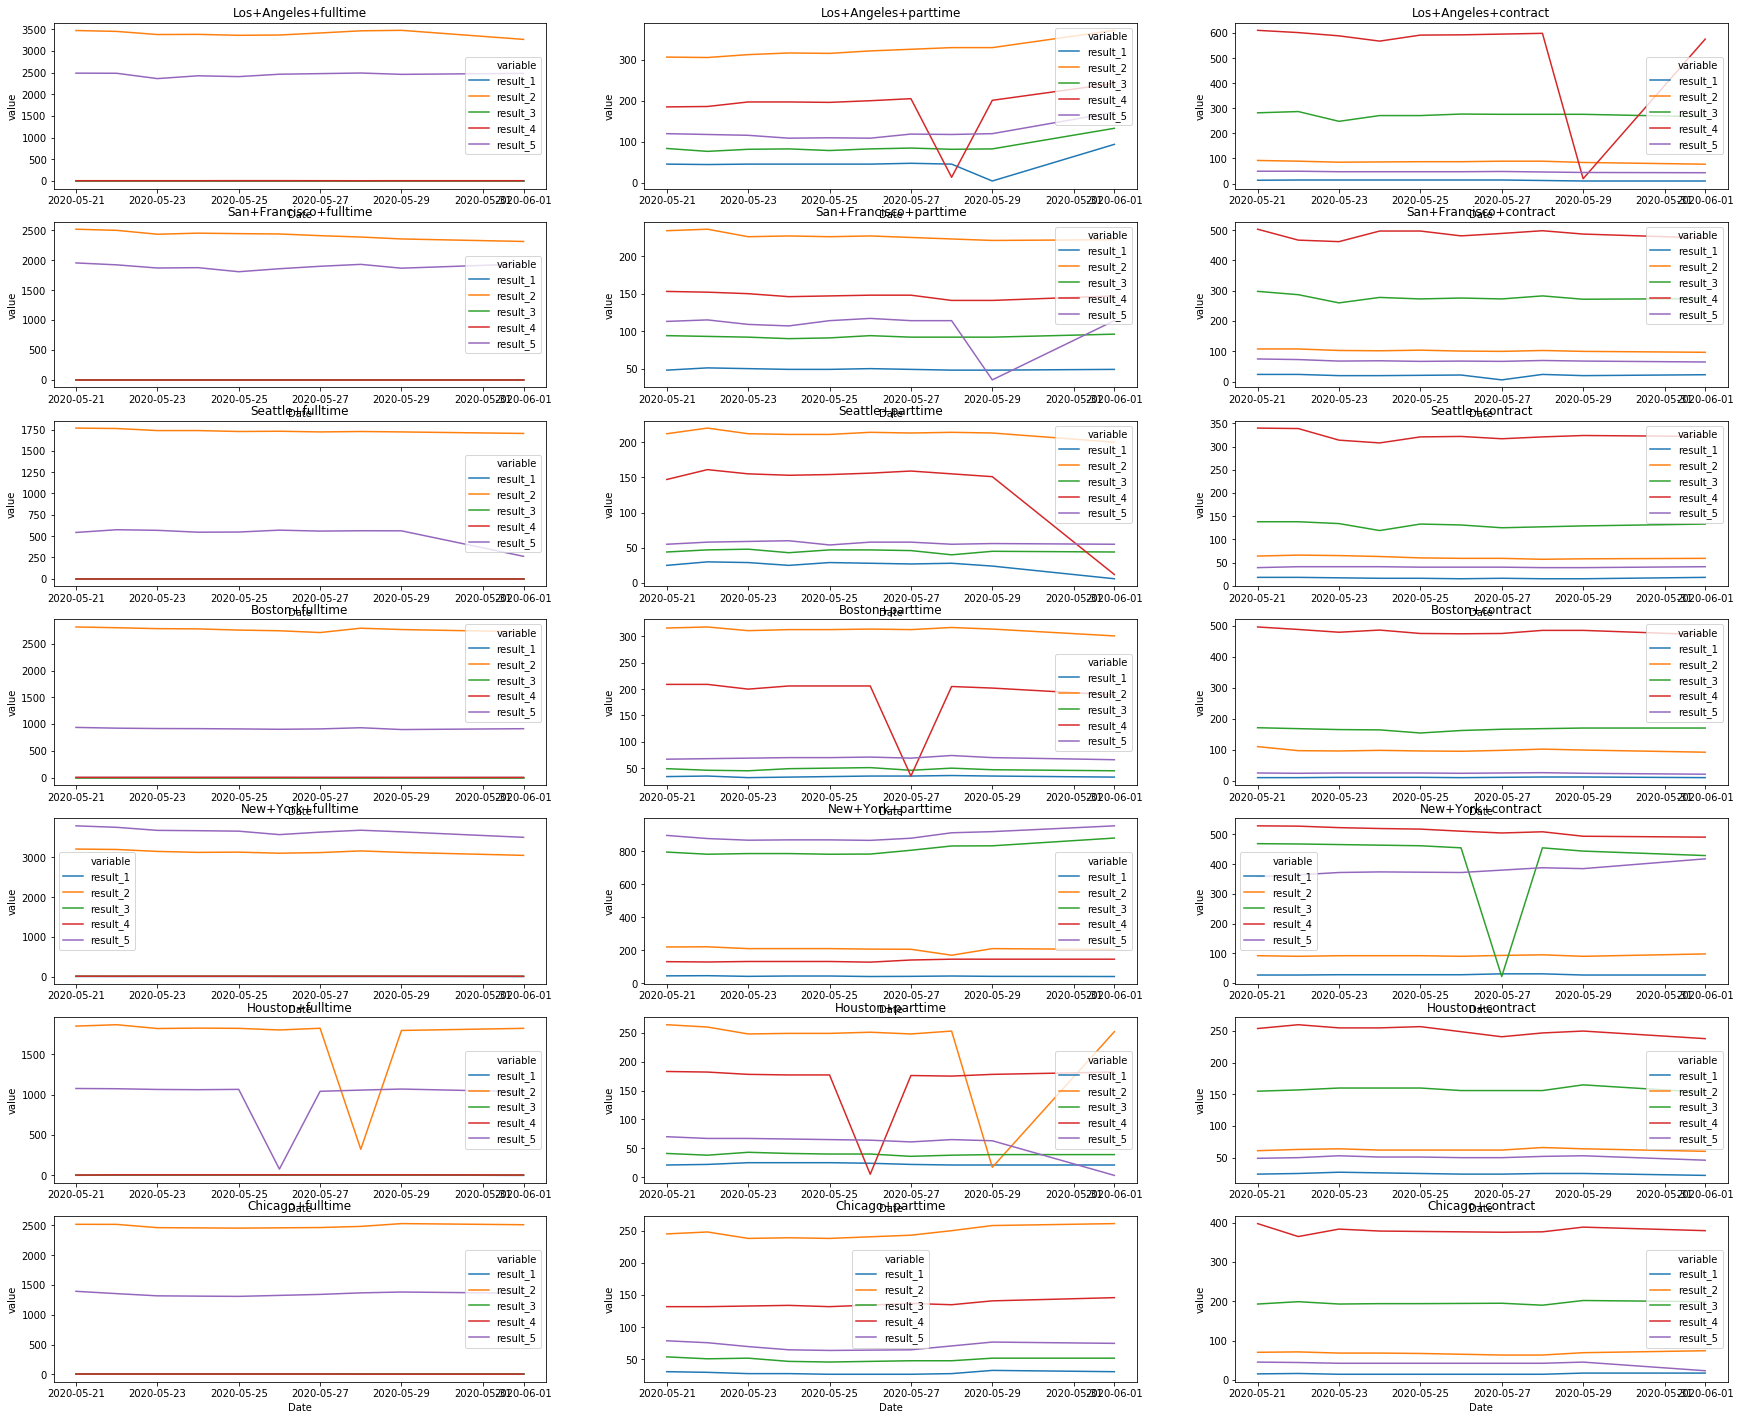

In [22]:
result = df[df['keyword']=='audit'].copy()
result['col'] = result['location'] + "+" +result['job type']

city_type = result['col'].unique().tolist()

fig, axes = plt.subplots(7, 3,figsize = (30,25))

row = 0
column = 0

for i in city_type:
    sub_result = pd.melt(result[result['col']== i],id_vars=['Date'],value_vars = ['result_1','result_2','result_3','result_4','result_5'])
    sns.lineplot(x = 'Date', y = 'value', hue = 'variable',estimator = None,data=sub_result, ax = axes[row][column]).set(title = i)
    column += 1
    if column == 3:
        row += 1
        column = 0

Then, I will give out my choice of search methods based on the graphs. 

And my criteria is really simple: the lines should perform a similar trend with the normals and there should be a "sufficient but not too large" number of jobs.

After all, I will create a table based on my suggestions.

In [23]:
rec1_result = [[5],[3,5],[2,3],
          [5],[3,4],[2,3],
          [5],[3,5],[2,3],
          [5],[3,5],[2,3],
          [4],[2,4],[2,5],
          [],[3],[2,3],
          [5],[3,5],[2,3]]

data = {}

for i in city_type:
    index = city_type.index(i)
    data.update({i: str(rec1_result[index])})

Rec = pd.DataFrame.from_dict(data, orient='index')

Rec['Job Info'] = Rec.index

job_type = []
location = []
for i in Rec['Job Info']:
    txt = i.split("+")
    job_type.append(txt[-1])
    if len(txt) > 2:
        city = txt[-3] + ' ' +txt[-2]
    location.append(city)

Rec['Job Type'] = job_type
Rec['Location'] = location

Rec.drop(columns = ['Job Info'])
Rec = Rec.rename(columns = {0:'Recommended Search Method'})
Rec = Rec[['Location','Job Type', 'Recommended Search Method']]
Rec.sort_values(by = ['Location','Job Type'])
Rec.reset_index(drop=True, inplace=True)

Rec

Location  Job Type Recommended Search Method
0     Los Angeles  fulltime                       [5]
1     Los Angeles  parttime                    [3, 5]
2     Los Angeles  contract                    [2, 3]
3   San Francisco  fulltime                       [5]
4   San Francisco  parttime                    [3, 4]
5   San Francisco  contract                    [2, 3]
6   San Francisco  fulltime                       [5]
7   San Francisco  parttime                    [3, 5]
8   San Francisco  contract                    [2, 3]
9   San Francisco  fulltime                       [5]
10  San Francisco  parttime                    [3, 5]
11  San Francisco  contract                    [2, 3]
12       New York  fulltime                       [4]
13       New York  parttime                    [2, 4]
14       New York  contract                    [2, 5]
15       New York  fulltime                        []
16       New York  parttime                       [3]
17       New York  contract                    [2, 3]
18       New York  fulltime                       [5]
19       New York  parttime                    [3, 5]
20       New York  contract                    [2, 3]

__Recommend based on location__

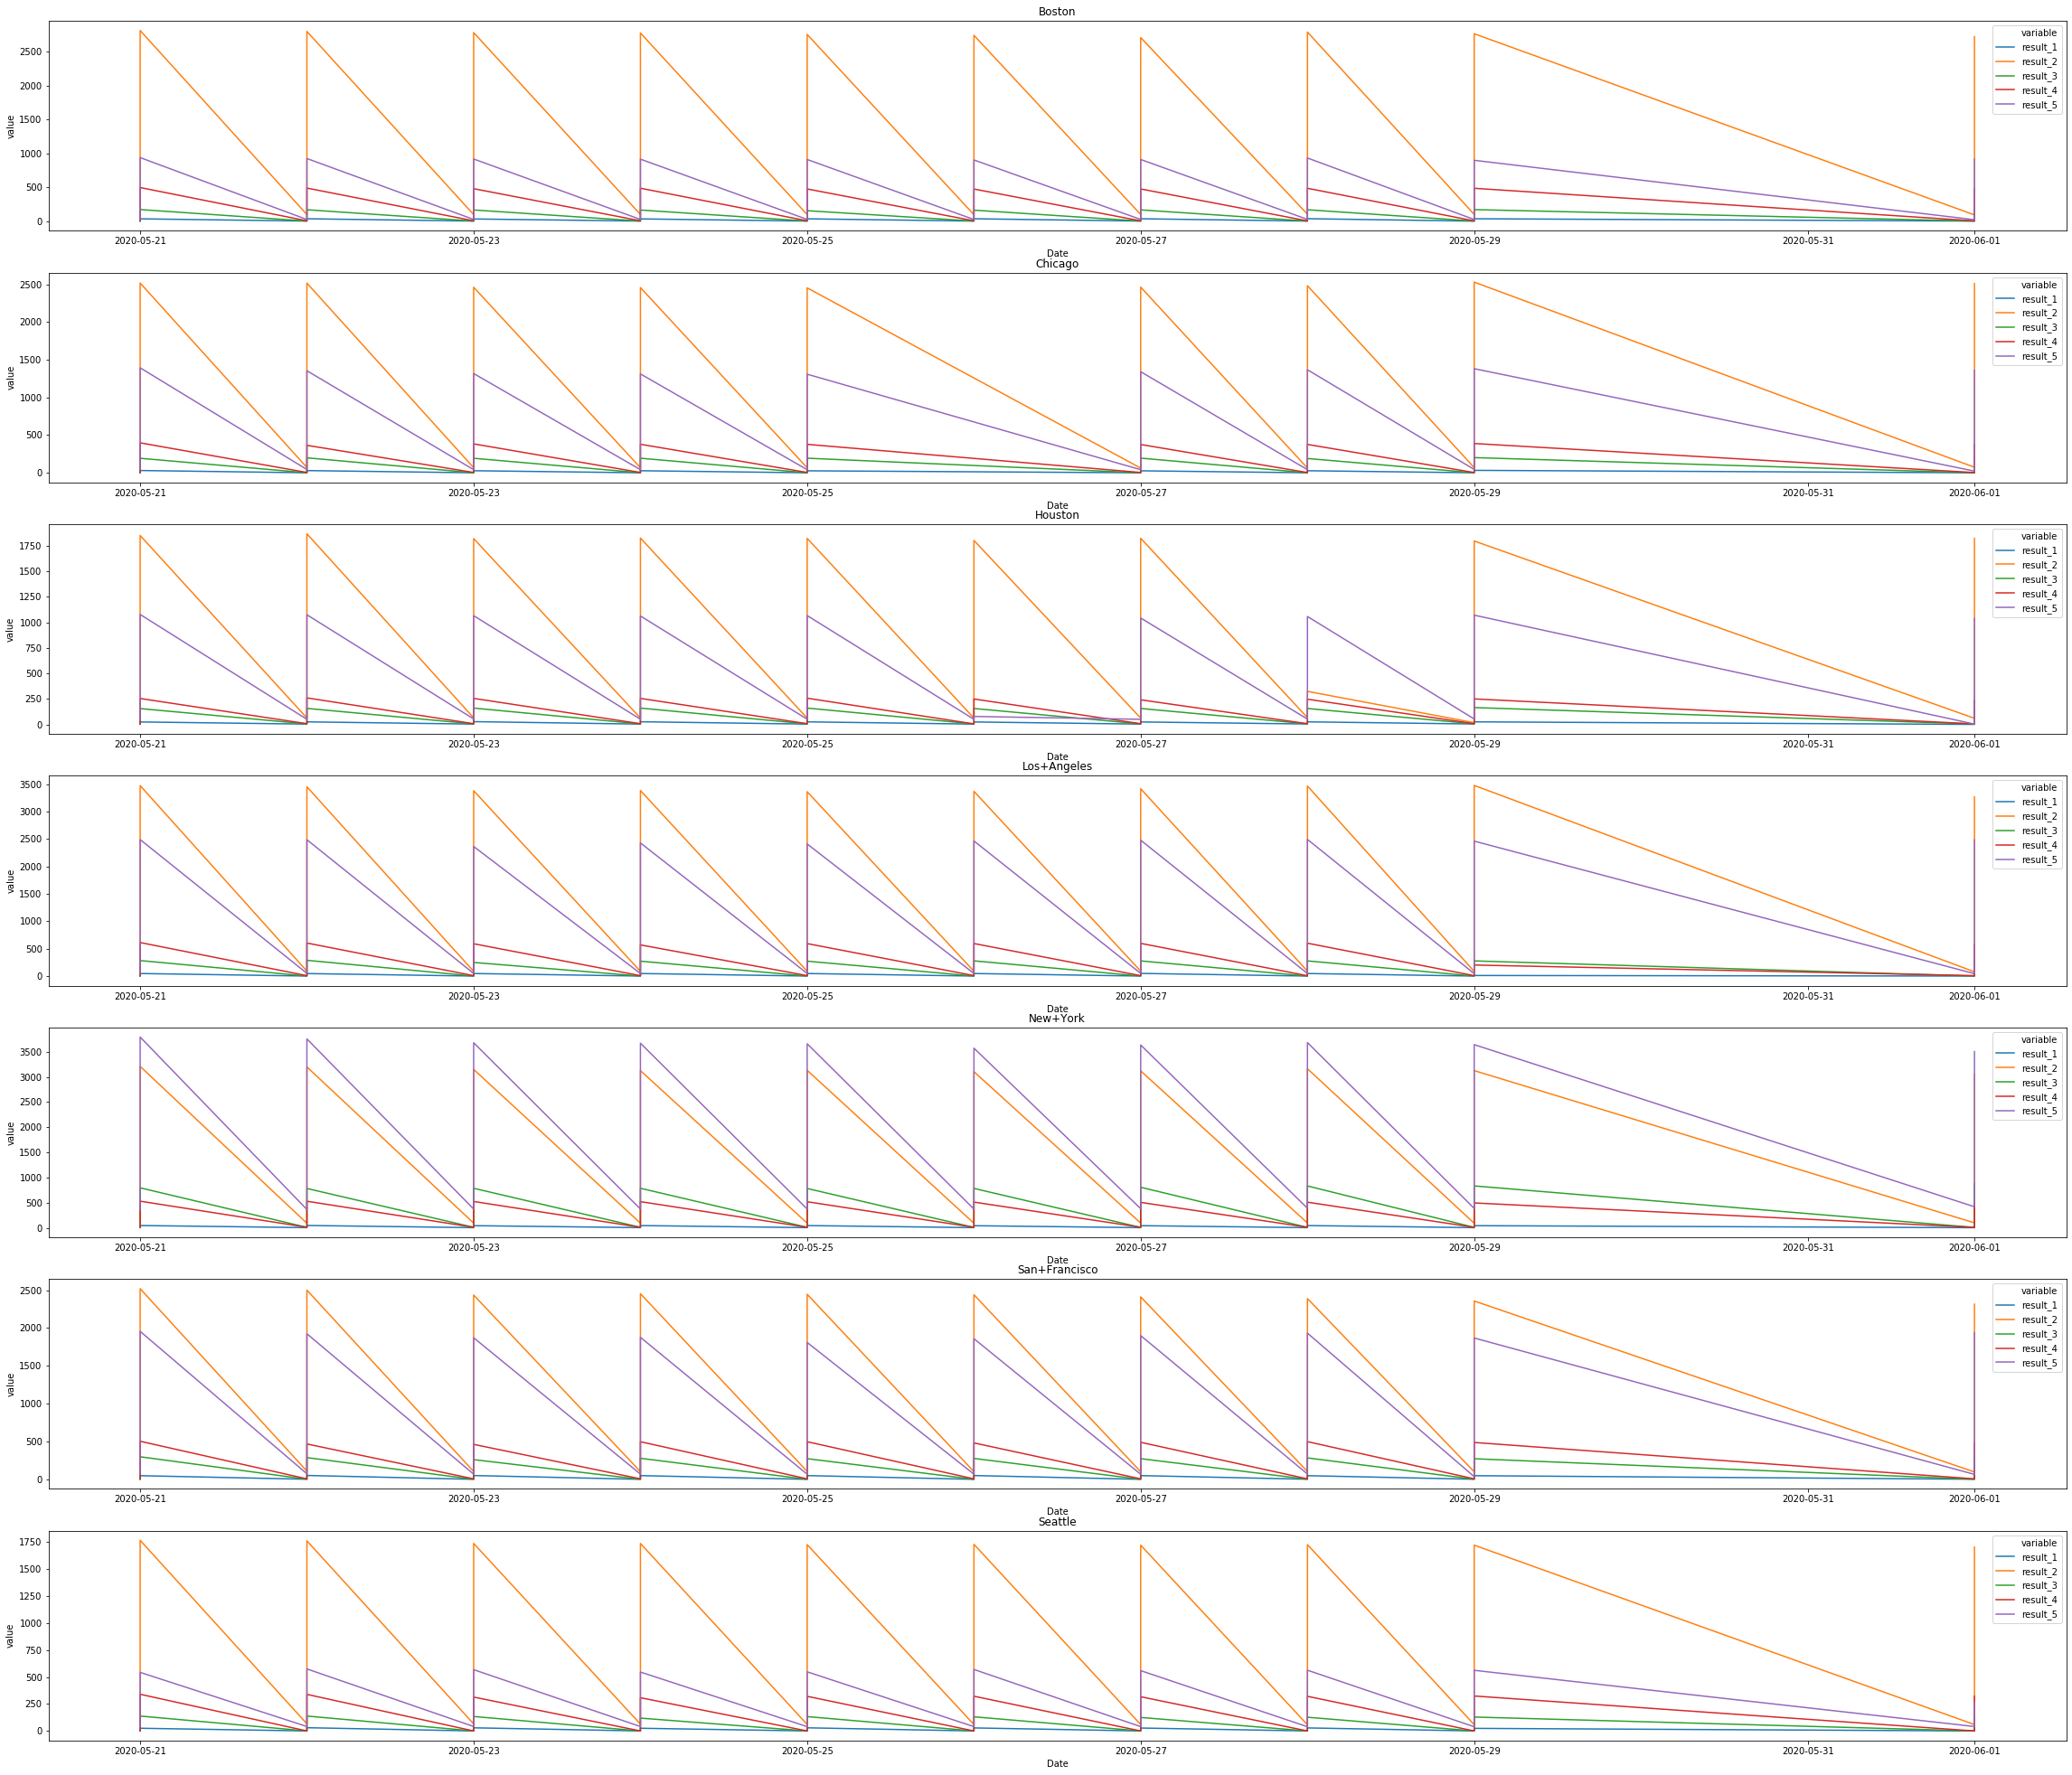

In [24]:
# Visualize the distribution of results based on location

location_result = result.groupby(['Date','location']).sum()
location_result.reset_index(inplace = True)

city = location_result['location'].unique().tolist()

fig, axes = plt.subplots(7,1,figsize = (40,35))

for i in city:
    sub_result = pd.melt(result[result['location']== i],id_vars=['Date'],
                         value_vars = ['result_1','result_2','result_3','result_4','result_5'])
    sns.lineplot(x = 'Date', y = 'value', hue = 'variable',estimator = None,data=sub_result, ax = axes[city.index(i)]).set(title = i)


Based on the graph, I would recommend 3 and 4 for job search.

__Recommendation based on job type__

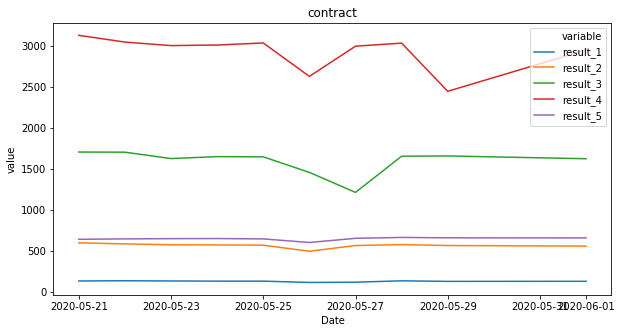

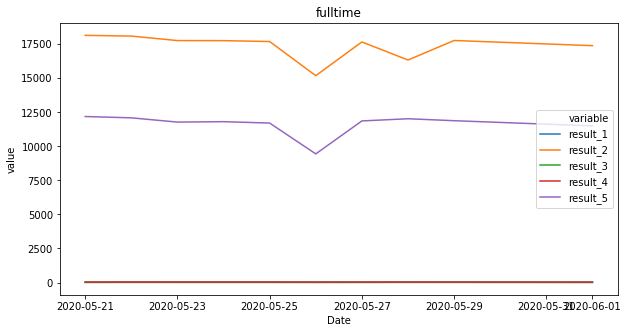

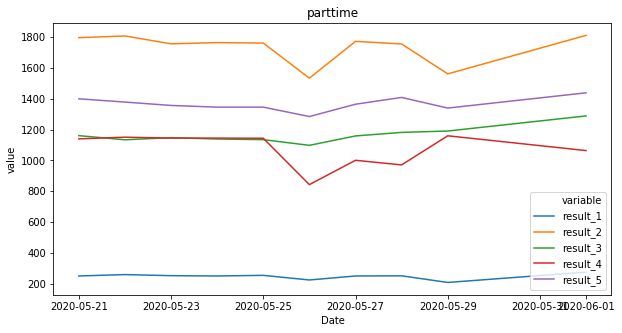

In [25]:
# Visualize the dsitribution of results based on job type

job_result = result.groupby(['Date','job type']).sum()
job_result.reset_index(inplace = True)
job_result

count = 1

for i in job_result['job type'].unique():
    plt.figure(count, figsize = (10,5))
    sub_result = pd.melt(job_result[job_result['job type']== i],id_vars=['Date'],value_vars = ['result_1','result_2','result_3','result_4','result_5'])
    sns.lineplot(x = 'Date', y = 'value', hue = 'variable',estimator = None,data=sub_result).set_title(i)
    count += 1

Based on the graphs, I would choose 5 for job searching.

# Sales

I will start with those who have requirements of both location and job type

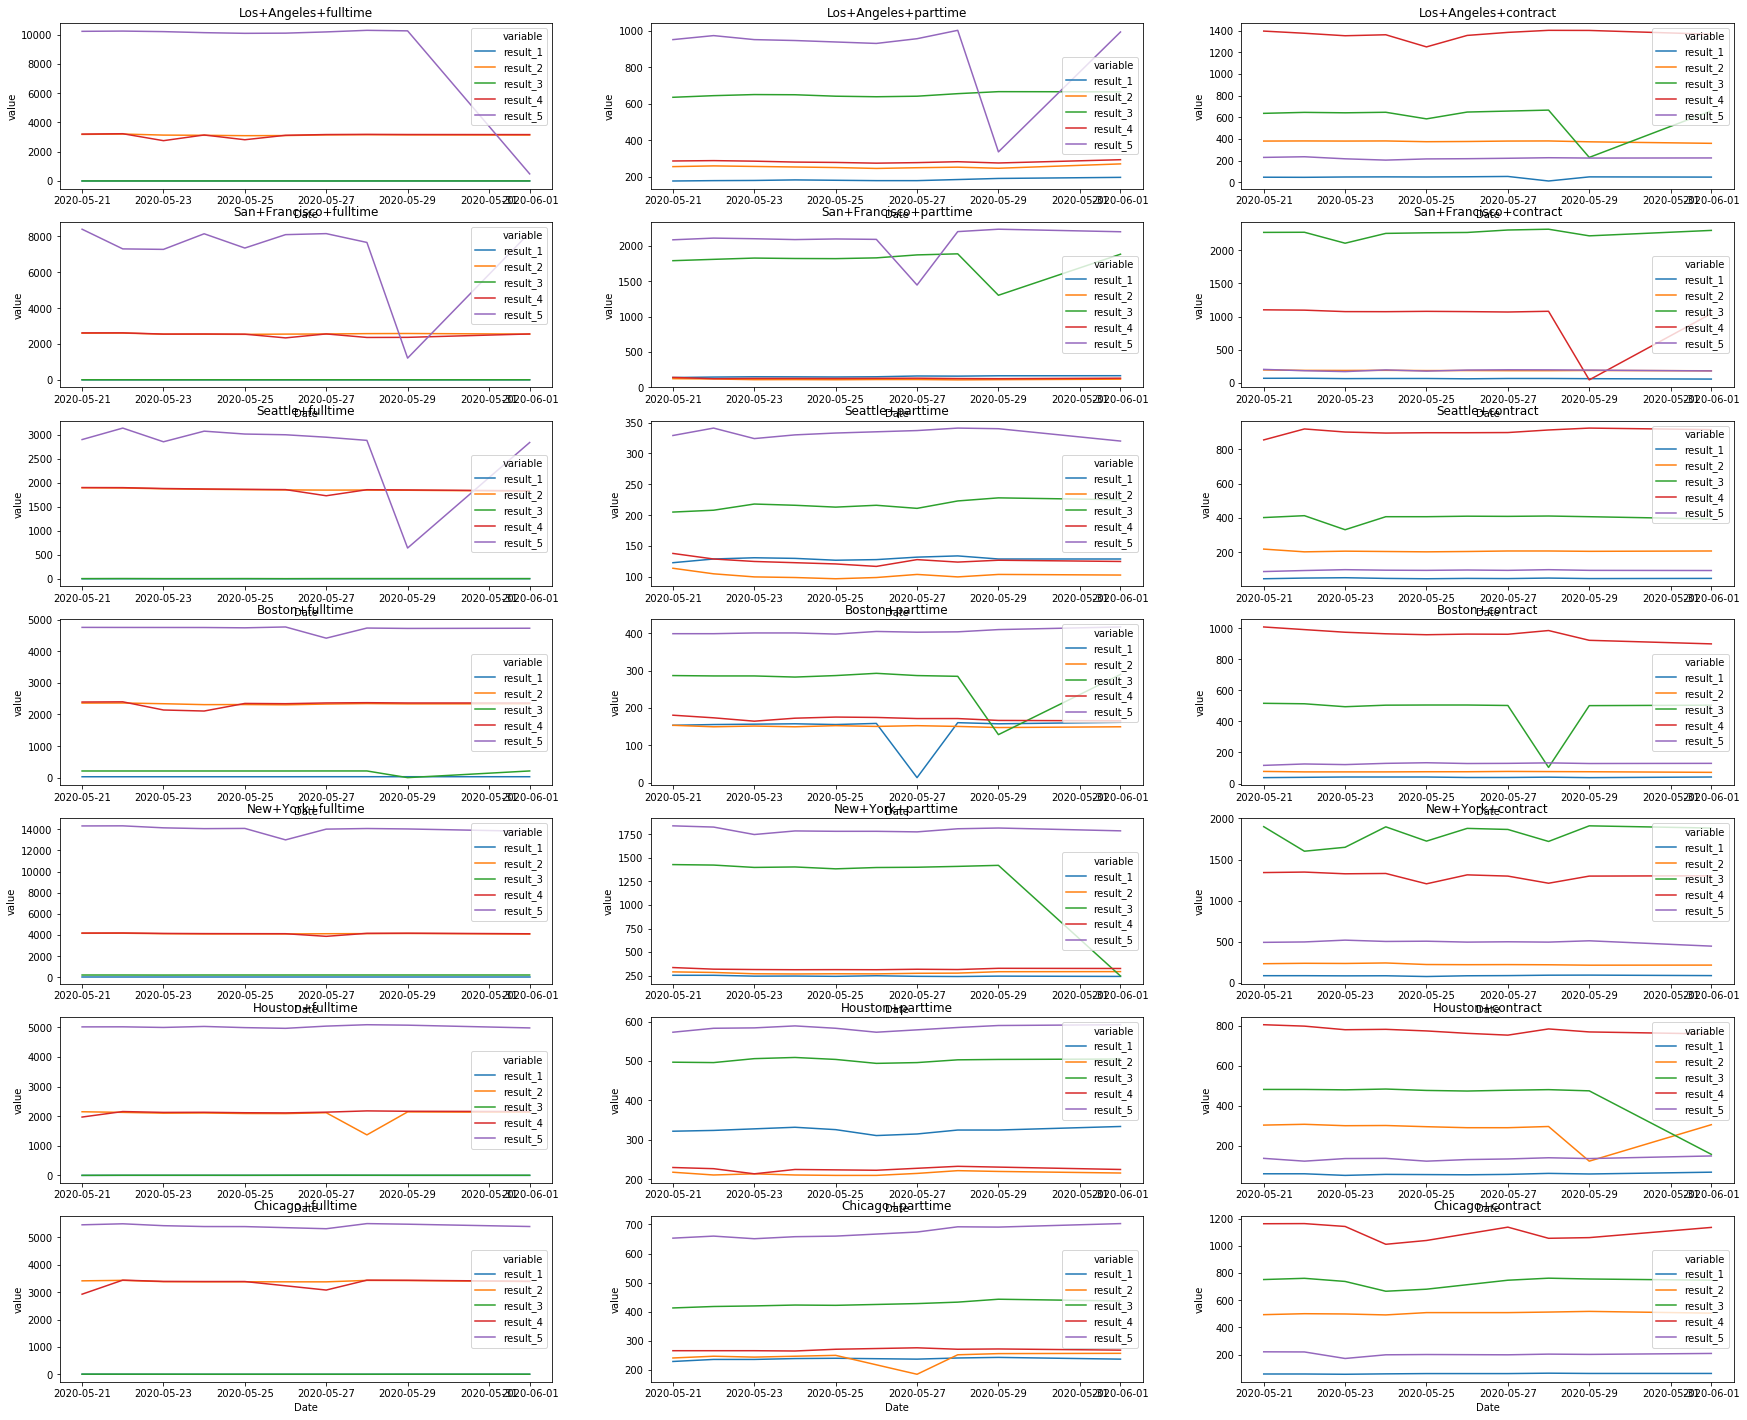

In [26]:
result = df[df['keyword']=='sales'].copy()
result['col'] = result['location'] + "+" +result['job type']

city_type = result['col'].unique().tolist()

fig, axes = plt.subplots(7, 3,figsize = (30,25))

row = 0
column = 0

for i in city_type:
    sub_result = pd.melt(result[result['col']== i],id_vars=['Date'],value_vars = ['result_1','result_2','result_3','result_4','result_5'])
    sns.lineplot(x = 'Date', y = 'value', hue = 'variable',estimator = None,data=sub_result, ax = axes[row][column]).set(title = i)
    column += 1
    if column == 3:
        row += 1
        column = 0

Then, I will give out my choice of search methods based on the graphs. 

And my criteria is really simple: the lines should perform a similar trend with the normals and there should be a "sufficient but not too large" number of jobs.

After all, I will create a table based on my suggestions.

In [27]:
rec1_result = [[2,4],[2,4],[2,5],
          [2,4],[],[5],
          [2,4],[1,4],[2,3],
          [2,4],[2,4],[2,5],
          [2,4],[1,4],[2,5],
          [2,4],[1],[5],
          [2,4],[3,4],[2]]

data = {}

for i in city_type:
    index = city_type.index(i)
    data.update({i: str(rec1_result[index])})

Rec = pd.DataFrame.from_dict(data, orient='index')

Rec['Job Info'] = Rec.index

job_type = []
location = []
for i in Rec['Job Info']:
    txt = i.split("+")
    job_type.append(txt[-1])
    if len(txt) > 2:
        city = txt[-3] + ' ' +txt[-2]
    location.append(city)

Rec['Job Type'] = job_type
Rec['Location'] = location

Rec.drop(columns = ['Job Info'])
Rec = Rec.rename(columns = {0:'Recommended Search Method'})
Rec = Rec[['Location','Job Type', 'Recommended Search Method']]
Rec.sort_values(by = ['Location','Job Type'])
Rec.reset_index(drop=True, inplace=True)

Rec

Location  Job Type Recommended Search Method
0     Los Angeles  fulltime                    [2, 4]
1     Los Angeles  parttime                    [2, 4]
2     Los Angeles  contract                    [2, 5]
3   San Francisco  fulltime                    [2, 4]
4   San Francisco  parttime                        []
5   San Francisco  contract                       [5]
6   San Francisco  fulltime                    [2, 4]
7   San Francisco  parttime                    [1, 4]
8   San Francisco  contract                    [2, 3]
9   San Francisco  fulltime                    [2, 4]
10  San Francisco  parttime                    [2, 4]
11  San Francisco  contract                    [2, 5]
12       New York  fulltime                    [2, 4]
13       New York  parttime                    [1, 4]
14       New York  contract                    [2, 5]
15       New York  fulltime                    [2, 4]
16       New York  parttime                       [1]
17       New York  contract                       [5]
18       New York  fulltime                    [2, 4]
19       New York  parttime                    [3, 4]
20       New York  contract                       [2]

__Recommend based on location__

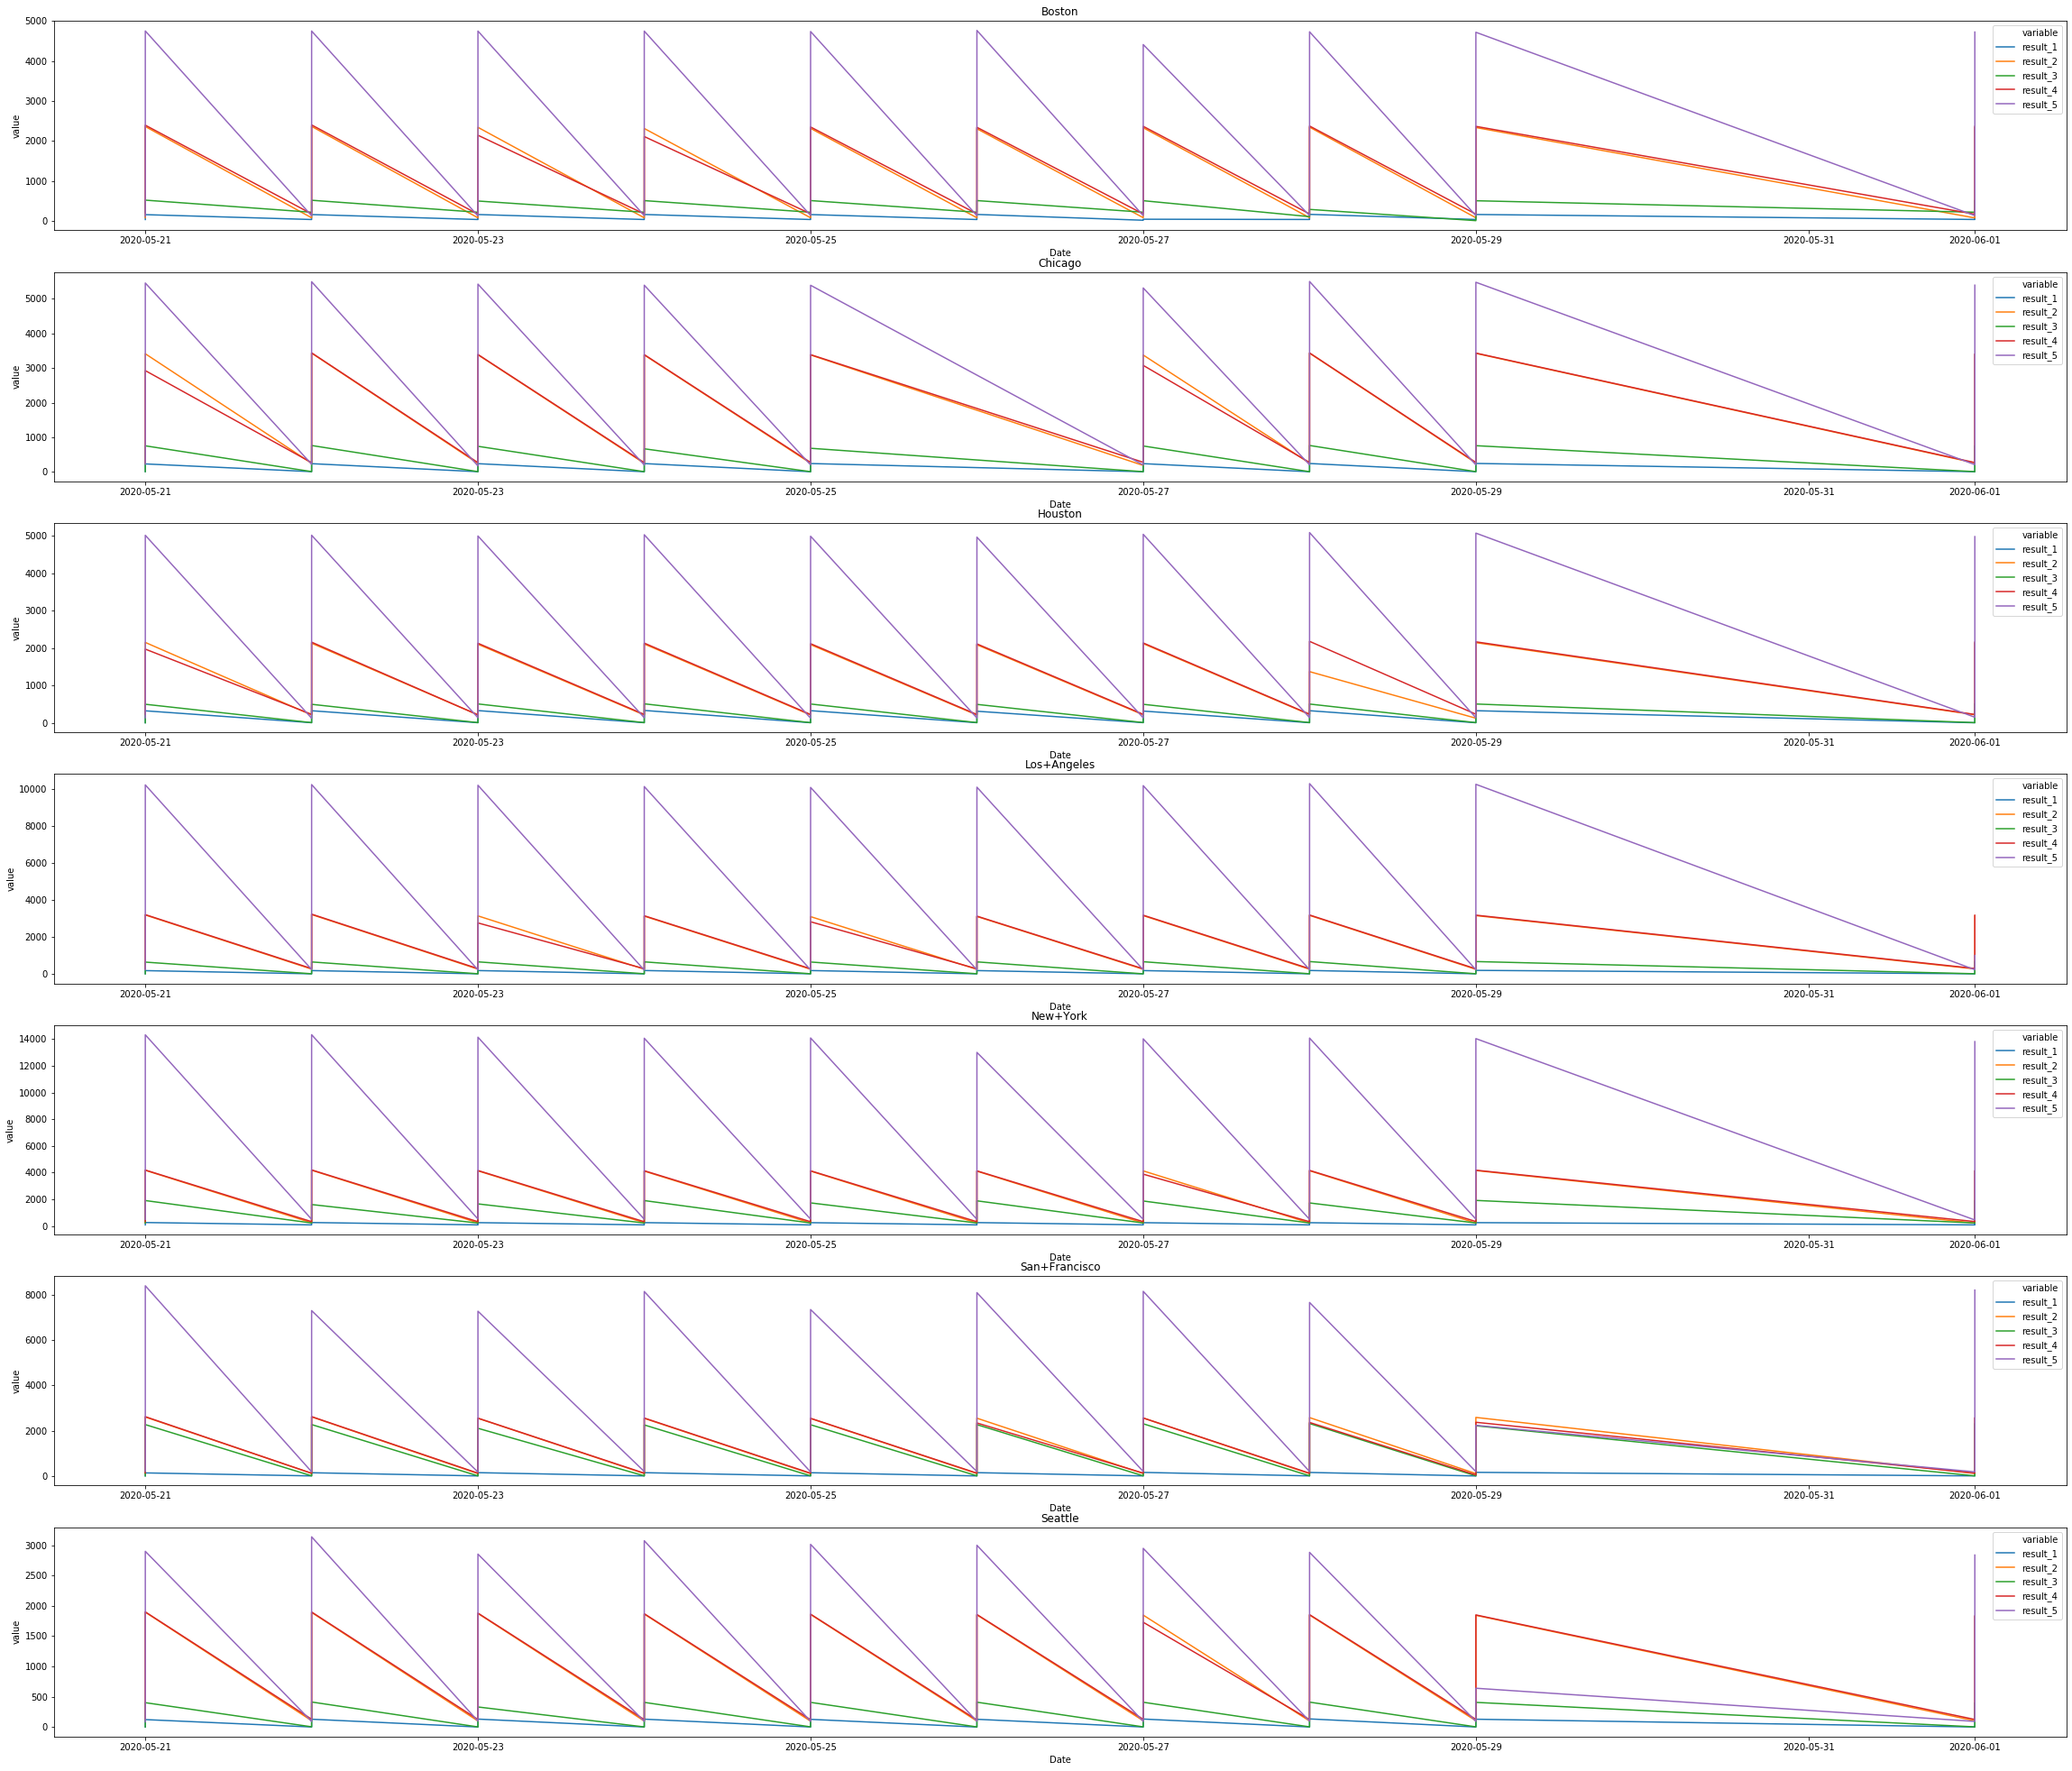

In [28]:
# Visualize the distribution of results based on location

location_result = result.groupby(['Date','location']).sum()
location_result.reset_index(inplace = True)

city = location_result['location'].unique().tolist()

fig, axes = plt.subplots(7,1,figsize = (40,35))

for i in city:
    sub_result = pd.melt(result[result['location']== i],id_vars=['Date'],
                         value_vars = ['result_1','result_2','result_3','result_4','result_5'])
    sns.lineplot(x = 'Date', y = 'value', hue = 'variable',estimator = None,data=sub_result, ax = axes[city.index(i)]).set(title = i)


Based on the graph, I would recommend 3 for job search.

__Recommendation based on job type__

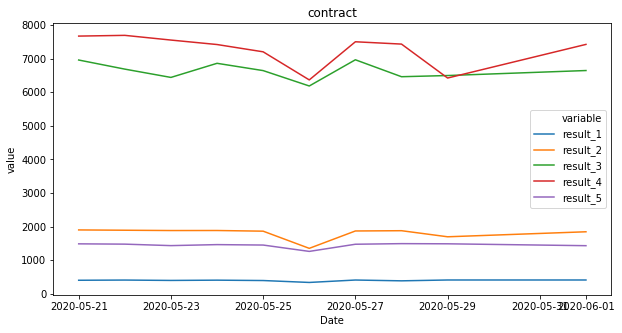

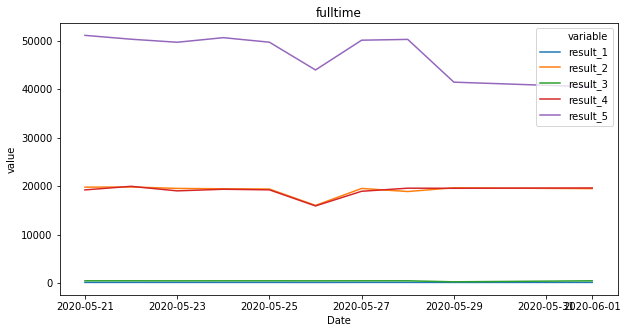

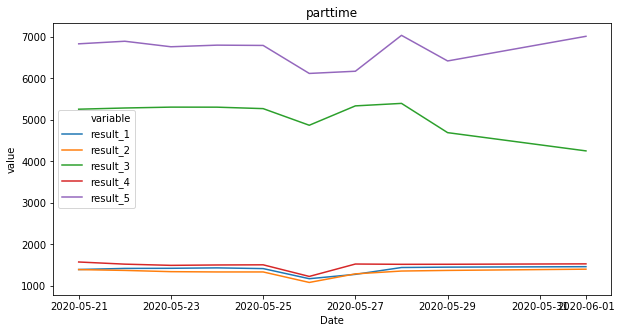

In [29]:
# Visualize the dsitribution of results based on job type

job_result = result.groupby(['Date','job type']).sum()
job_result.reset_index(inplace = True)
job_result

count = 1

for i in job_result['job type'].unique():
    plt.figure(count, figsize = (10,5))
    sub_result = pd.melt(job_result[job_result['job type']== i],id_vars=['Date'],value_vars = ['result_1','result_2','result_3','result_4','result_5'])
    sns.lineplot(x = 'Date', y = 'value', hue = 'variable',estimator = None,data=sub_result).set_title(i)
    count += 1

Based on the graphs, I would choose 2 for job searching.

__That is all my analysis. Thank you very much for taking a look! I really look forward to any advice.__